---



# <h1 align=center> **Ruth Castañeda Bojorques** </h1>




---

#<font color='green'>**Análisis Exploratorio de Datos (EDA)**

# **Introducción**


El Análisis Exploratorio de Datos (EDA) es una fase fundamental en cualquier proyecto de Ciencia de Datos y Machine Learning. Una vez que los datos han sido depurados, se pueden examinar las relaciones entre las variables del conjunto de datos. Este proceso incluye la detección de outliers o anomalías, que no siempre son errores, y la identificación de patrones relevantes que podrían ser útiles en análisis futuros.

En este proyecto, el EDA se utilizará para explorar el conjunto de datos proporcionado por el Ente Nacional de Telecomunicaciones (**ENACOM**), con el objetivo de analizar el desempeño del sector de telecomunicaciones a nivel nacional y ofrecer recomendaciones estratégicas a la empresa que ha solicitado mis servicios.

**El análisis detallado de los datos permitirá orientar a la empresa en la mejora de la calidad de sus servicios, identificar áreas de oportunidad para su expansión y desarrollar soluciones personalizadas para satisfacer las necesidades específicas de sus clientes.**

# **Importar bibliotecas**

In [ ]:
#Se importan las librerías necesarias para el análisis
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

In [ ]:
# suprimir advertencias específicas generadas durante la ejecución de un programa

warnings.filterwarnings("ignore", category=FutureWarning)


# **Ingesta de datos**

Se cuenta con los siguientes conjuntos de datos, descargados desde el sitio oficial del Ente Nacional de Comunicaciones (ENACOM): [https://indicadores.enacom.gob.ar/datos-abiertos](https://indicadores.enacom.gob.ar/datos-abiertos):


* 1) Internet
* 2) Mapa Conectividad


Estos conjuntos de datos están almacenados en mi unidad personal de Google Drive y son de acceso público.

In [167]:
# Descarga del dataset 1 (Internet)
!gdown https://drive.google.com/uc?id=1GvusZ_uNiDw4VI7sYz0F7f4VnYedmG8-

# Descarga del dataset 2 (Mapa Conectividad)
!gdown https://drive.google.com/uc?id=19sGJSE2pMeTiUH7D4zkLFcs-q4CC8sXY

Downloading...
From: https://drive.google.com/uc?id=1GvusZ_uNiDw4VI7sYz0F7f4VnYedmG8-
To: /content/mapa_conectividad.xlsx
100% 457k/457k [00:00<00:00, 110MB/s]
Downloading...
From: https://drive.google.com/uc?id=19sGJSE2pMeTiUH7D4zkLFcs-q4CC8sXY
To: /content/Internet.xlsx
100% 2.12M/2.12M [00:00<00:00, 151MB/s]


# **Detalle de las hojas que conforman el dataset "Internet.xlsx**

**1. Acc_vel_loc_sinrangos:**
Contiene datos sobre accesos a internet en localidades específicas, con información sobre velocidades y su asociación con partidos y provincias.

**2. Velocidad_sin_Rangos:**
Proporciona un resumen de la velocidad de conexión y el número de accesos clasificados por provincia, año y trimestre.

**3. Accesos_tecnologia_localidad:**
Datos detallados de accesos a internet categorizados por localidad, partido y tecnología utilizada.

**4. Velocidad _%_por_prov:**
Muestra la velocidad promedio de bajada en Mbps por provincia, con segmentación temporal.

**5. Totales_VMD:**
Resumen total de velocidades medias de bajada, agrupadas por año y trimestre.

**6. Totales_accesos _por_tecnología:**
Totales de accesos a internet por tipo de tecnología, diferenciados por año, trimestre y tipo de conexión.

**7. accesos_por_tecnologí:a**
Accesos a internet por tipo de tecnología en diferentes provincias, con clasificación temporal.

**8. Penetración_poblacion:**
Indicadores de penetración de internet en la población, expresados como accesos por cada 100 habitantes.

**9. Penetracion_hogares:**
Datos sobre la penetración de internet en hogares, expresados como accesos por cada 100 hogares.

**10. Penetracion_totales:**
Combina métricas de penetración tanto en la población como en los hogares, organizadas por periodos.

**11. Totales_Accesos_por_rango:**
Detalle de los accesos a internet segmentados por rango de velocidad, año y trimestre.

**12. Accesos_por_rangos:**
Accesos a internet segmentados por rangos de velocidad y distribuidos por provincia.

**13. Dial_BAf:**
Proporción de accesos a internet diferenciados entre banda ancha fija y conexiones dial-up.

**14. Totales_Dial_BAf:**
Resumen total de accesos a internet por tipo de conexión, agrupados por periodos.

**15. Ingresos:**
Ingresos generados por los servicios de internet, clasificados por periodos temporales.



# **Resumen de datos**

In [168]:
import pandas as pd

# Cargar el archivo Excel
xls = pd.ExcelFile('Internet.xlsx')

# Obtener todas las hojas del archivo
hojas = xls.sheet_names  # Lista de todas las hojas en el archivo

# Mostrar el resumen de cada hoja
for hoja in hojas:
    try:
        # Cargar la hoja actual
        df = pd.read_excel(xls, sheet_name=hoja)

        # Imprimir el resumen
        print(f"**{hoja}**")
        display(df.head())
        print(f"Dimensiones: {df.shape}")
        print(f"Columnas: {df.columns}\n")

    except Exception as e:
        print(f"Error al procesar la hoja '{hoja}': {e}\n")


**Acc_vel_loc_sinrangos**


Partido   Localidad  link Indec Velocidad (Mbps)  Provincia  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.00      1.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.50      2.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.75     19.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.00     85.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.50    145.0

Dimensiones: (18864, 6)
Columnas: Index(['Partido', 'Localidad', 'link Indec', 'Velocidad (Mbps)', 'Provincia',
       'Accesos'],
      dtype='object')

**Velocidad_sin_Rangos**


Año  Trimestre     Provincia  Velocidad  Accesos
0  2024          2  BUENOS AIRES       75.0     1062
1  2024          2  BUENOS AIRES       59.0       59
2  2024          2  BUENOS AIRES      480.0        5
3  2024          2  BUENOS AIRES        3.5    41735
4  2024          2  BUENOS AIRES       18.0     1042

Dimensiones: (18884, 5)
Columnas: Index(['Año', 'Trimestre', 'Provincia', 'Velocidad', 'Accesos'], dtype='object')

**Accesos_tecnologia_localidad**


Provincia     Partido   Localidad    Tecnologia Link Indec  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          ADSL    6854100    755.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo    CABLEMODEM    6854100   4600.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo  FIBRA OPTICA    6854100      2.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo     SATELITAL    6854100    742.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo      WIRELESS    6854100    727.0

Dimensiones: (7753, 6)
Columnas: Index(['Provincia', 'Partido', 'Localidad', 'Tecnologia', 'Link Indec',
       'Accesos'],
      dtype='object')

**Velocidad _%_por_prov**


Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          2     Buenos Aires                  157.41
1  2024          2  Capital Federal                  233.01
2  2024          2        Catamarca                   97.38
3  2024          2            Chaco                  107.76
4  2024          2           Chubut                   21.67

Dimensiones: (1008, 4)
Columnas: Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)'], dtype='object')

**Totales_VMD**


Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2024          2                  139.25   Abr-Jun 2024
1  2024          1                  139.15   Ene-Mar 2024
2  2023          4                  139.04   Oct-Dic 2023
3  2023          3                  129.67  Jul-Sept 2023
4  2023          2                  123.95   Abr-Jun 2023

Dimensiones: (42, 4)
Columnas: Index(['Año', 'Trimestre', 'Mbps (Media de bajada)', 'Trimestre.1'], dtype='object')

**Totales_accesos _por_tecnología**


Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2024          2   733491     5867504       4169958    593197  191957   
1  2024          1   774475     5986957       4015101    598682  257941   
2  2023          4   836390     6022532       3908183    585760  194796   
3  2023          3   897895     6018832       3708718    581436  200027   
4  2023          2  1006509     5997149       3463988    581823  202428   

      Total        Periodo  
0  11556107   Abr-Jun 2024  
1  11633156   Ene-Mar 2024  
2  11547661   Oct-Dic 2023  
3  11406908  Jul-Sept 2023  
4  11251897   Abr-Jun 2023

Dimensiones: (42, 9)
Columnas: Index(['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Otros', 'Total', 'Periodo'],
      dtype='object')

**accesos_por_tecnología**


Año Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
0  2024         2     Buenos Aires  214055.0   2722466.0     1849476.0   
1  2024         2  Capital Federal   54102.0   1144781.0      230402.0   
2  2024         2        Catamarca    4951.0     10303.0       58355.0   
3  2024         2            Chaco    9448.0     57935.0       68944.0   
4  2024         2           Chubut   25955.0     80704.0       26516.0   

   Wireless    Otros      Total  
0  138638.0  64745.0  4989380.0  
1    4493.0  29821.0  1463599.0  
2    1384.0     81.0    75074.0  
3    8407.0   2358.0   147092.0  
4   31118.0   9930.0   174223.0

Dimensiones: (1009, 9)
Columnas: Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

**Penetración_poblacion**


Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2024          2     Buenos Aires                     27.43
1  2024          2  Capital Federal                     47.44
2  2024          2        Catamarca                     17.50
3  2024          2            Chaco                     11.78
4  2024          2           Chubut                     26.46

Dimensiones: (1000, 4)
Columnas: Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab'], dtype='object')

**Penetracion_hogares**


Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2024          2     Buenos Aires                         79.84
1  2024          2  Capital Federal                        116.37
2  2024          2        Catamarca                         68.81
3  2024          2            Chaco                         44.06
4  2024          2           Chubut                         86.33

Dimensiones: (1000, 4)
Columnas: Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')

**Penetracion_totales**


Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2024          2                         78.13                     24.57   
1  2024          1                         78.89                     24.79   
2  2023          4                         78.56                     24.66   
3  2023          3                         77.84                     24.41   
4  2023          2                         77.02                     24.14   

         Periodo  
0   Abr-Jun 2024  
1   Ene-Mar 2024  
2   Oct-Dic 2023  
3  Jul-Sept 2023  
4   Abr-Jun 2023

Dimensiones: (42, 5)
Columnas: Index(['Año', 'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'Periodo'],
      dtype='object')

**Totales_Accesos_por_rango**


Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  2024          2           28151                    67024   
1  2024          1           28801                    69355   
2  2023          4           29708                    71742   
3  2023          3           30274                    80609   
4  2023          2           30827                    79405   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                 840200                  911374                   662649   
1                 866152                  950930                   672155   
2                 900253                  978108                   697232   
3                 945608                  998725                   720084   
4                 963510                 1028250                   734125   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps   OTROS     Total  
0                   348253         8357088  341368  11556107  
1                   353896         8363694  328173  11633156  
2                   350290         8224736  295592  11547661  
3                   350918         8003269  277421  11406908  
4                   364730         7775095  275955  11251897

Dimensiones: (42, 11)
Columnas: Index(['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total'],
      dtype='object')

**Accesos_por_rangos**


Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          2     Buenos Aires         25287.0              23034.0   
1  2024          2  Capital Federal           518.0               4122.0   
2  2024          2        Catamarca            72.0                164.0   
3  2024          2            Chaco           236.0                349.0   
4  2024          2           Chubut           125.0               1139.0   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           222627.0            221660.0             244528.0   
1            24539.0             40296.0              33158.0   
2             2660.0              3093.0               3799.0   
3            14594.0              8336.0               6208.0   
4            43699.0             31971.0              22696.0   

   + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
0             106302.0  4020395.0  125547.0  4989380.0  
1               5633.0  1355333.0       0.0  1463599.0  
2               1279.0    63954.0      53.0    75074.0  
3               6454.0   107707.0    3208.0   147092.0  
4              19827.0    38212.0   16554.0   174223.0

Dimensiones: (1000, 12)
Columnas: Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

**Dial_BAf**


Año  Trimestre        Provincia  Banda ancha fija  Dial up    Total
0  2024          2     Buenos Aires           4983480   5900.0  4989380
1  2024          2  Capital Federal           1461549   2050.0  1463599
2  2024          2        Catamarca             75073      1.0    75074
3  2024          2            Chaco            147087      5.0   147092
4  2024          2           Chubut            173366    857.0   174223

Dimensiones: (1992, 6)
Columnas: Index(['Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Dial up',
       'Total'],
      dtype='object')

**Totales_Dial_BAf**


Año  Trimestre  Banda ancha fija  Dial up     Total        Periodo
0  2024          2          11544314    11793  11556107   Abr-Jun 2024
1  2024          1          11621363    11793  11633156   Ene-Mar 2024
2  2023          4          11535868    11793  11547661   Oct-Dic 2023
3  2023          3          11395115    11793  11406908  Jul-Sept 2023
4  2023          2          11239781    12116  11251897   Abr-Jun 2023

Dimensiones: (42, 6)
Columnas: Index(['Año', 'Trimestre', 'Banda ancha fija', 'Dial up', 'Total', 'Periodo'], dtype='object')

**Ingresos **


Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2024          2               4.420322e+08   Abr-Jun 2024
1  2024          1               3.461990e+08   Ene-Mar 2024
2  2023          4               1.673760e+08   Oct-Dic 2023
3  2023          3               1.331066e+08  Jul-Sept 2023
4  2023          2               1.180603e+08   Jun-Mar 2023

Dimensiones: (42, 4)
Columnas: Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')



# **Seleccion de los dataset con los que se va a trabajar**

## Para efectos de nuestro EDA vamos trabajar con las diguientes hojas del archivo excel Internet.xlsx
#### **1. Acc_vel_loc_sinrangos**
#### **2. Velocidad_sin_Rangos**
#### **3. Velocidad_por_prov**
#### **4. Accesos_por_tecnología**
#### **5. Penetración_poblacion**
#### **6. Penetracion_hogares**
#### **7. Penetracion_totales**
#### **8. Accesos_por_rangos**
#### **9. Ingresos**

## Las siguientes hojas no se consideraran debido la informacion que contienen esta detallada en las hojas seleccionadas

#### **Totales_VMD**
#### **Totales_accesos_por_tecnología**
#### **Totales_Accesos_por_rango**
#### **Totales_Dial_BAf**
#### **Accesos_tecnologia_localidad**
#### **Dial_BAf**


# **Limpieza de datos**
#### Esto incluye la identificación y el manejo de valores faltantes, duplicados y tipos de datos incorrectos.

## **Identificacion de valores Nulos por hoja**

In [169]:
# Calcular el porcentaje de valores nulos por hoja en un archivo Excel
import pandas as pd
import matplotlib.pyplot as plt

def calcular_porcentaje_nulos(ruta_archivo):
    # Cargar el archivo Excel
    xls = pd.ExcelFile(ruta_archivo)

    # Crear un diccionario para almacenar los resultados
    porcentaje_nulos = {}

    # Iterar sobre cada hoja en el archivo
    for hoja in xls.sheet_names:
        # Leer la hoja actual
        df = pd.read_excel(xls, hoja)

        # Calcular el porcentaje de valores nulos
        porcentaje_nulo = df.isnull().mean().mean() * 100

        # Almacenar el resultado en el diccionario
        porcentaje_nulos[hoja] = porcentaje_nulo

    return porcentaje_nulos

# Mostrar una tabla estilizada de los resultados

def mostrar_tabla_colores(porcentaje_nulos):
    # Convertir el diccionario en un DataFrame
    df_nulos = pd.DataFrame(list(porcentaje_nulos.items()), columns=['Hoja', 'Porcentaje Nulos'])

    # Definir la función para aplicar estilos
    def resaltar_porcentaje(val):
        color = 'lightgreen' if val == 0 else ''
        return f'background-color: {color}'

    # Aplicar estilos a la tabla
    styled_table = df_nulos.style.applymap(resaltar_porcentaje, subset=['Porcentaje Nulos'])

    # Mostrar la tabla estilizada
    display(styled_table)

# Uso de las funciones
ruta_archivo = 'Internet.xlsx'
resultado = calcular_porcentaje_nulos(ruta_archivo)
mostrar_tabla_colores(resultado)

## Resumen
##### **Mayor porcentaje de nulos:**
La hoja accesos_por_tecnología con 17.62%. Esta requiere atención especial, ya que los datos faltantes podrían afectar análisis o cálculos posteriores.
##### **Menor porcentaje (sin nulos):**
Varias hojas tienen 0% de nulos y están listas para su uso.
##### **Porcentaje intermedio:**
Hojas como Dial_BAf (3.35%) o Accesos_por_rangos (5.00%) tienen valores nulos que, aunque no son críticos, podrían ser relevantes dependiendo del análisis.

## **Identificacion de valores Nulos por columna**

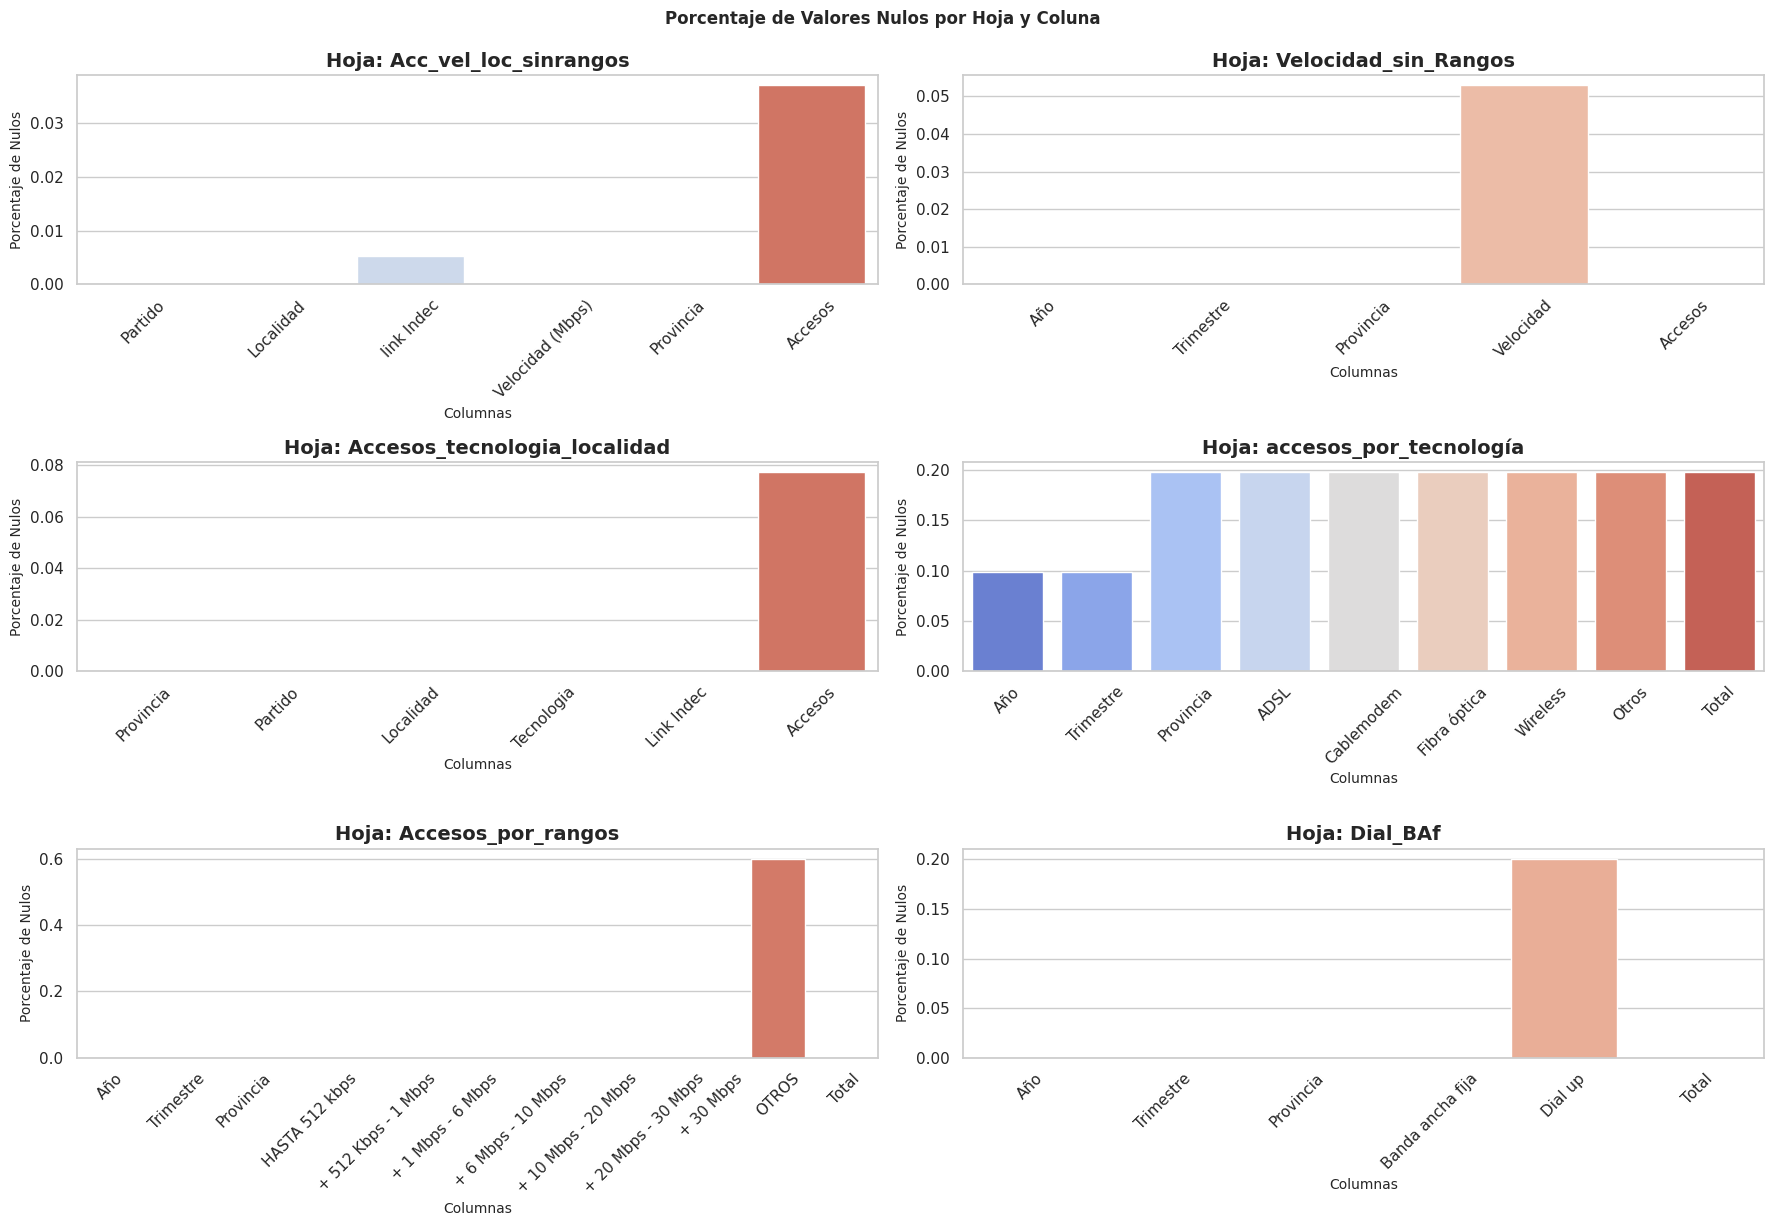

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel
xls = pd.ExcelFile('Internet.xlsx')

# Lista de hojas a analizar
hojas = ['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad',
         'accesos_por_tecnología', 'Accesos_por_rangos', 'Dial_BAf']

# Configurar el tamaño de la figura y el estilo
plt.figure(figsize=(18, 12))
sns.set_theme(style="whitegrid")

# Crear un subplot para cada hoja
n = len(hojas)
cols = 2  # Número de columnas en la cuadrícula
rows = (n // cols) + (n % cols > 0)  # Calcular filas necesarias

for i, hoja in enumerate(hojas, 1):
    try:
        # Leer los datos de la hoja
        df = pd.read_excel(xls, hoja)

        # Calcular el porcentaje de valores nulos por columna
        nulos_por_columna = df.isnull().sum() / len(df) * 100

        # Crear el subplot
        ax = plt.subplot(rows, cols, i)
        sns.barplot(x=nulos_por_columna.index, y=nulos_por_columna.values, palette="coolwarm", ax=ax)

        # Configurar el estilo del gráfico
        ax.set_title(f'Hoja: {hoja}', fontsize=14, weight='bold')
        ax.set_ylabel('Porcentaje de Nulos', fontsize=10)
        ax.set_xlabel('Columnas', fontsize=10)
        ax.tick_params(axis='x', rotation=45)

    except Exception as e:
        print(f"Error al procesar la hoja '{hoja}': {e}")

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.suptitle('Porcentaje de Valores Nulos por Hoja y Coluna', fontsize=12, weight='bold', y=1.02)
plt.show()


## **Resumen**
 los gráficos muestran visualmente la distribución de valores nulos en cada columna de las hojas especificadas.  Las barras más altas indican una mayor proporción de valores faltantes, señalando áreas que requieren atención en el proceso de limpieza y preprocesamiento de los datos antes de realizar cualquier análisis o modelado.  Si las barras son altas en columnas cruciales para el análisis, se deben considerar estrategias para imputar esos valores o descartar las columnas o filas afectadas, dependiendo de la cantidad y naturaleza de los datos faltantes.

## **Rellenar valores nulos con cero**

In [172]:

# Cargar el archivo Excel
xls = pd.ExcelFile('Internet.xlsx')

# Crear un diccionario para almacenar los DataFrames modificados
dfs_modificados = {}

# Iterar sobre todas las hojas del archivo Excel
for sheet_name in xls.sheet_names:
    try:
        # Leer los datos de la hoja actual
        df = pd.read_excel(xls, sheet_name=sheet_name)

        # Rellenar los valores nulos con 0
        df.fillna(0, inplace=True)

        # Guardar el DataFrame modificado en el diccionario
        dfs_modificados[sheet_name] = df

        # Imprimir mensaje indicando que se han rellenado los valores nulos
        print(f"Valores nulos rellenados con 0 en la hoja '{sheet_name}'")

    except Exception as e:
        # Imprimir un mensaje de error en caso de problemas al procesar una hoja
        print(f"Error al procesar la hoja '{sheet_name}': {e}")

# Guardar todos los DataFrames en un nuevo archivo Excel
output_file = 'Internet_cleaned.xlsx'

# Utilizar ExcelWriter para guardar varias hojas
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    for sheet_name, df in dfs_modificados.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"El archivo con los cambios se ha guardado como '{output_file}'.")


Valores nulos rellenados con 0 en la hoja 'Acc_vel_loc_sinrangos'
Valores nulos rellenados con 0 en la hoja 'Velocidad_sin_Rangos'
Valores nulos rellenados con 0 en la hoja 'Accesos_tecnologia_localidad'
Valores nulos rellenados con 0 en la hoja 'Velocidad _%_por_prov'
Valores nulos rellenados con 0 en la hoja 'Totales_VMD'
Valores nulos rellenados con 0 en la hoja 'Totales_accesos _por_tecnología'
Valores nulos rellenados con 0 en la hoja 'accesos_por_tecnología'
Valores nulos rellenados con 0 en la hoja 'Penetración_poblacion'
Valores nulos rellenados con 0 en la hoja 'Penetracion_hogares'
Valores nulos rellenados con 0 en la hoja 'Penetracion_totales'
Valores nulos rellenados con 0 en la hoja 'Totales_Accesos_por_rango'
Valores nulos rellenados con 0 en la hoja 'Accesos_por_rangos'
Valores nulos rellenados con 0 en la hoja 'Dial_BAf'
Valores nulos rellenados con 0 en la hoja 'Totales_Dial_BAf'
Valores nulos rellenados con 0 en la hoja 'Ingresos '
El archivo con los cambios se ha gua

## **verificar si lo valores nulos entan rellenados**

In [173]:
import pandas as pd

# Cargar el archivo modificado
output_file = 'Internet_cleaned.xlsx'
xls_modified = pd.ExcelFile(output_file)

# Verificar los valores nulos en cada hoja
for sheet_name in xls_modified.sheet_names:
    try:
        # Leer la hoja
        df = pd.read_excel(xls_modified, sheet_name=sheet_name)

        # Contar valores nulos
        nulos_totales = df.isnull().sum().sum()

        if nulos_totales == 0:
            print(f"No hay valores nulos en la hoja '{sheet_name}'. Todos los nulos fueron reemplazados correctamente.")
        else:
            print(f"Advertencia: La hoja '{sheet_name}' todavía tiene {nulos_totales} valores nulos.")
    except Exception as e:
        print(f"Error al verificar la hoja '{sheet_name}': {e}")


No hay valores nulos en la hoja 'Acc_vel_loc_sinrangos'. Todos los nulos fueron reemplazados correctamente.
No hay valores nulos en la hoja 'Velocidad_sin_Rangos'. Todos los nulos fueron reemplazados correctamente.
No hay valores nulos en la hoja 'Accesos_tecnologia_localidad'. Todos los nulos fueron reemplazados correctamente.
No hay valores nulos en la hoja 'Velocidad _%_por_prov'. Todos los nulos fueron reemplazados correctamente.
No hay valores nulos en la hoja 'Totales_VMD'. Todos los nulos fueron reemplazados correctamente.
No hay valores nulos en la hoja 'Totales_accesos _por_tecnología'. Todos los nulos fueron reemplazados correctamente.
No hay valores nulos en la hoja 'accesos_por_tecnología'. Todos los nulos fueron reemplazados correctamente.
No hay valores nulos en la hoja 'Penetración_poblacion'. Todos los nulos fueron reemplazados correctamente.
No hay valores nulos en la hoja 'Penetracion_hogares'. Todos los nulos fueron reemplazados correctamente.
No hay valores nulos en

## **Identificacion de datos duplicados**

In [174]:
# Cargar el archivo Excel limpio
xls_cleaned = pd.ExcelFile('Internet_cleaned.xlsx')

# Crear un diccionario para almacenar los DataFrames modificados
dfs_no_duplicates = {}

# Iterar sobre cada hoja del archivo
for sheet_name in xls_cleaned.sheet_names:
    try:
        # Leer la hoja actual
        df = pd.read_excel(xls_cleaned, sheet_name=sheet_name)

        # Eliminar filas duplicadas
        df_no_duplicates = df.drop_duplicates()

        # Guardar el DataFrame sin duplicados en el diccionario
        dfs_no_duplicates[sheet_name] = df_no_duplicates

        # Imprimir el número de filas eliminadas
        num_duplicates = len(df) - len(df_no_duplicates)
        print(f"Se eliminaron {num_duplicates} filas duplicadas de la hoja '{sheet_name}'.")

    except Exception as e:
        print(f"Error al procesar la hoja '{sheet_name}': {e}")

# Guardar los DataFrames sin duplicados en un nuevo archivo Excel
output_file_no_duplicates = 'Internet_cleaned_no_duplicates.xlsx'

with pd.ExcelWriter(output_file_no_duplicates, engine='openpyxl') as writer:
    for sheet_name, df in dfs_no_duplicates.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"El archivo sin duplicados se ha guardado como '{output_file_no_duplicates}'.")

Se eliminaron 0 filas duplicadas de la hoja 'Acc_vel_loc_sinrangos'.
Se eliminaron 0 filas duplicadas de la hoja 'Velocidad_sin_Rangos'.
Se eliminaron 0 filas duplicadas de la hoja 'Accesos_tecnologia_localidad'.
Se eliminaron 0 filas duplicadas de la hoja 'Velocidad _%_por_prov'.
Se eliminaron 0 filas duplicadas de la hoja 'Totales_VMD'.
Se eliminaron 0 filas duplicadas de la hoja 'Totales_accesos _por_tecnología'.
Se eliminaron 0 filas duplicadas de la hoja 'accesos_por_tecnología'.
Se eliminaron 0 filas duplicadas de la hoja 'Penetración_poblacion'.
Se eliminaron 0 filas duplicadas de la hoja 'Penetracion_hogares'.
Se eliminaron 0 filas duplicadas de la hoja 'Penetracion_totales'.
Se eliminaron 0 filas duplicadas de la hoja 'Totales_Accesos_por_rango'.
Se eliminaron 0 filas duplicadas de la hoja 'Accesos_por_rangos'.
Se eliminaron 984 filas duplicadas de la hoja 'Dial_BAf'.
Se eliminaron 0 filas duplicadas de la hoja 'Totales_Dial_BAf'.
Se eliminaron 0 filas duplicadas de la hoja 'I

# **Análisis de cada hoja**

# **1. Análisis "Acc_vel_loc_sinrangos"**

## **1.1 Información general de dataset**

In [175]:
# Leer la hoja "Acc_vel_loc_sinrangos"
import pandas as pd

# Cargar el archivo Excel
xls = pd.ExcelFile('Internet_cleaned_no_duplicates.xlsx')

# Leer la hoja específica
h1 = pd.read_excel(xls, sheet_name='Acc_vel_loc_sinrangos')

# Mostrar las primeras filas del DataFrame
print(h1.head())


        Partido   Localidad  link Indec Velocidad (Mbps)  Provincia  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.00        1
1  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.50        2
2  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.75       19
3  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.00       85
4  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.50      145


## Se verifica que los datos de los registros no coindicen con los nombres de las columnas por lo cual se procedera con el cambio:
####   - Ajustar las columnas  
####   - *'Partido'* → *'Provincia'*  
####   - *'Localidad'* → *'Partido'*  
####   - *'link Indec'* → *'Localidad'*  
####   - *'Velocidad (Mbps)'* → *'link Indec'*  
####   - *'Provincia'* → *'Velocidad (Mbps)'*  
####   - *'Accesos'* se mantuvo igual.

In [176]:
# Cargar el archivo Excel
xls = pd.ExcelFile('Internet_cleaned_no_duplicates.xlsx')

# Leer la hoja específica
h1 = pd.read_excel(xls, sheet_name='Acc_vel_loc_sinrangos')

# Renombrar las columnas
h1 = h1.rename(columns={
    'Partido': 'Provincia',
    'Localidad': 'Partido',
    'link Indec': 'Localidad',
    'Velocidad (Mbps)': 'link Indec',
    'Provincia': 'Velocidad (Mbps)'
})

# Guardar el DataFrame modificado en un nuevo archivo Excel
with pd.ExcelWriter('Internet_cleaned_renamed.xlsx', engine='openpyxl', mode='w') as writer:
    h1.to_excel(writer, sheet_name='Acc_vel_loc_sinrangos', index=False)

# Mostrar las primeras filas del DataFrame
print(h1.head())

      Provincia     Partido   Localidad link Indec  Velocidad (Mbps)  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              0.00        1
1  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              0.50        2
2  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              0.75       19
3  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              3.00       85
4  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              3.50      145


In [177]:
# Obtener la forma de la hoja (número de filas y columnas)
print(h1.shape)

# Obtener los nombres de las columnas
print(h1.columns)

# Obtener los tipos de datos de cada columna
print(h1.dtypes)

(18864, 6)
Index(['Provincia', 'Partido', 'Localidad', 'link Indec', 'Velocidad (Mbps)',
       'Accesos'],
      dtype='object')
Provincia            object
Partido              object
Localidad            object
link Indec           object
Velocidad (Mbps)    float64
Accesos               int64
dtype: object


## Corregir el tipo de datos

In [178]:
import pandas as pd

# Supongamos que el DataFrame es h1
def ajustar_tipos_correctos(h1):
    # Convertir columnas categóricas al tipo "category" para optimizar
    columnas_categoricas = ['Provincia', 'Partido', 'Localidad', 'link Indec']
    h1[columnas_categoricas] = h1[columnas_categoricas].astype('category')

    # Convertir Velocidad (Mbps) a float
    h1['Velocidad (Mbps)'] = pd.to_numeric(h1['Velocidad (Mbps)'], errors='coerce')

    # Convertir Accesos a int
    h1['Accesos'] = h1['Accesos'].astype(int)

    return h1

# Aplicar los cambios al DataFrame
h1 = ajustar_tipos_correctos(h1)

# Verificar los tipos de datos actualizados
print(h1.dtypes)


Provincia           category
Partido             category
Localidad           category
link Indec          category
Velocidad (Mbps)     float64
Accesos                int64
dtype: object


##  **1.2 Histograma de velocidad (Mbps)**

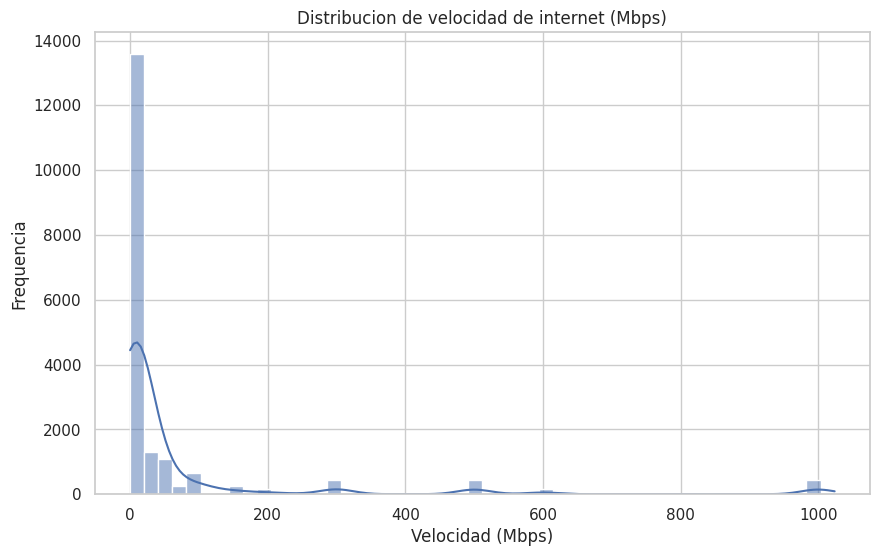

In [179]:

plt.figure(figsize=(10, 6))
sns.histplot(h1['Velocidad (Mbps)'], bins=50, kde=True)
plt.title('Distribucion de velocidad de internet (Mbps)')
plt.xlabel('Velocidad (Mbps)')
plt.ylabel('Frequencia')
plt.show()

## **1.3 Distribución de Velocidad de Internet por Provincia**

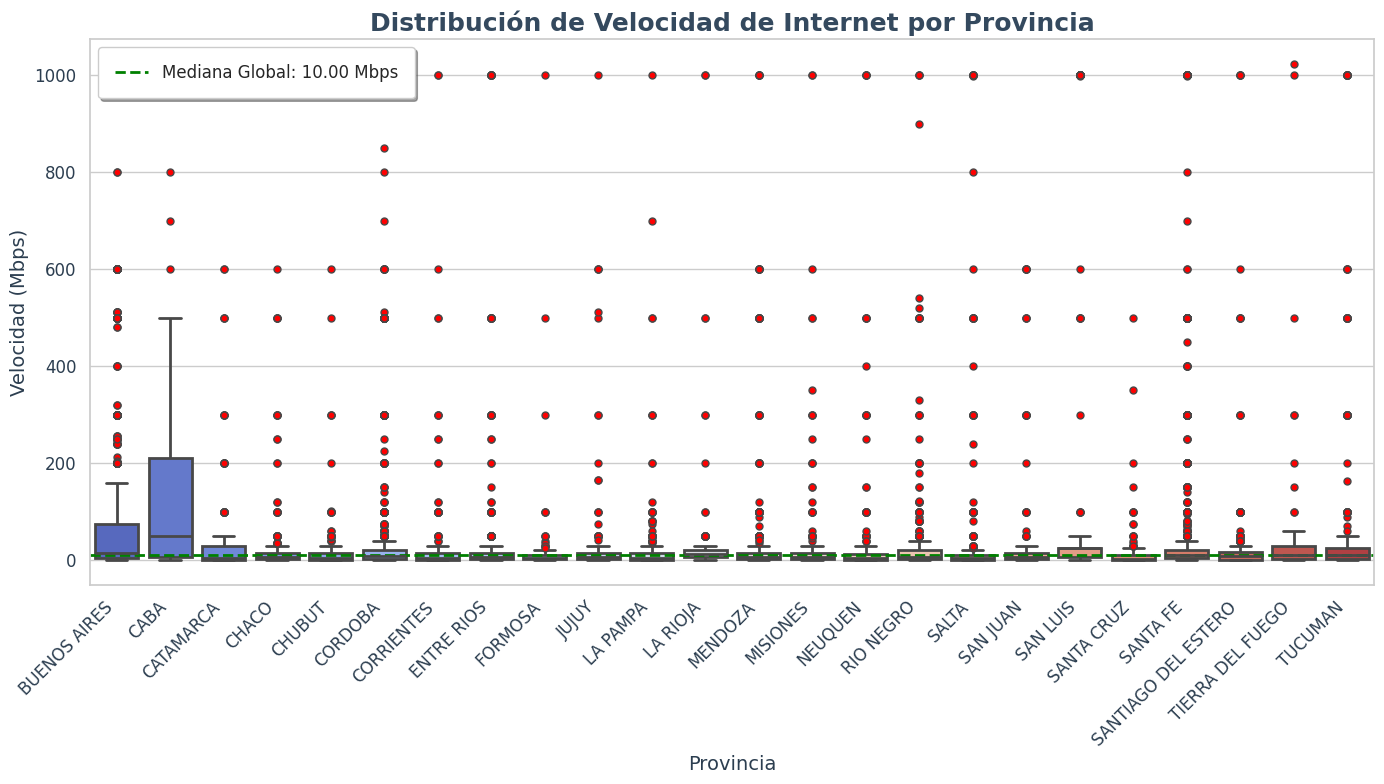

In [180]:
# Configurar el estilo del gráfico
sns.set_theme(style="whitegrid", palette="muted")

# Crear el gráfico
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Provincia',
    y='Velocidad (Mbps)',
    data=h1,
    palette="coolwarm",  # Paleta de colores más vibrante
    linewidth=2,  # Ajustar el grosor de las líneas del boxplot
    fliersize=5,  # Tamaño de los valores atípicos
    flierprops=dict(markerfacecolor='red', marker='o')  # Destacar outliers en rojo
)

# Añadir títulos y etiquetas
plt.title('Distribución de Velocidad de Internet por Provincia', fontsize=18, fontweight='bold', color='#34495e')
plt.xlabel('Provincia', fontsize=14, color='#2c3e50')
plt.ylabel('Velocidad (Mbps)', fontsize=14, color='#2c3e50')

# Ajustar los ticks del eje X
plt.xticks(fontsize=12, rotation=45, ha='right', color='#2c3e50')
plt.yticks(fontsize=12, color='#2c3e50')

# Añadir una línea de referencia para la mediana global
mediana_global = h1['Velocidad (Mbps)'].median()
plt.axhline(mediana_global, color='green', linestyle='--', linewidth=2, label=f"Mediana Global: {mediana_global:.2f} Mbps")

# Añadir leyenda
plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True, borderpad=1)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## **1.4 Distribución de Velocidad vs. Número de Accesos**

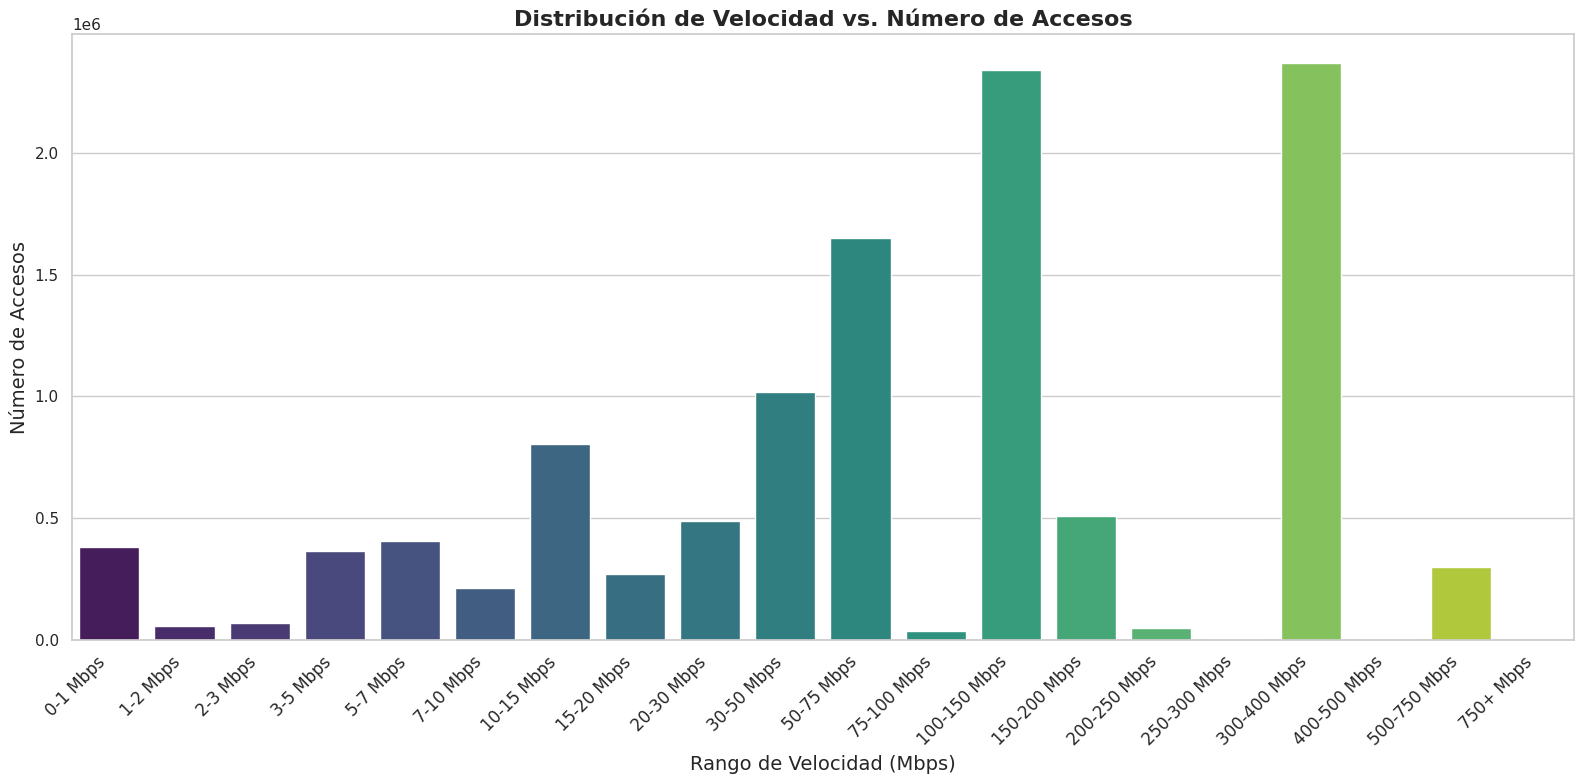

In [ ]:
# Cargar los datos
xls = pd.ExcelFile('Internet_cleaned_renamed.xlsx')
h1 = pd.read_excel(xls, sheet_name='Acc_vel_loc_sinrangos')

# Crear rangos más granulares de velocidad (triplicando la granularidad)
bins = [
    0, 1, 2, 3, 5, 7, 10, 15, 20, 30, 50, 75, 100, 150, 200, 250, 300, 400, 500, 750, 1000
]
labels = [
    '0-1 Mbps', '1-2 Mbps', '2-3 Mbps', '3-5 Mbps', '5-7 Mbps',
    '7-10 Mbps', '10-15 Mbps', '15-20 Mbps', '20-30 Mbps', '30-50 Mbps',
    '50-75 Mbps', '75-100 Mbps', '100-150 Mbps', '150-200 Mbps',
    '200-250 Mbps', '250-300 Mbps', '300-400 Mbps', '400-500 Mbps',
    '500-750 Mbps', '750+ Mbps'
]
h1['Rango Velocidad'] = pd.cut(h1['Velocidad (Mbps)'], bins=bins, labels=labels, right=False)

# Agrupar por rango de velocidad y calcular la suma de accesos
grouped_data = h1.groupby('Rango Velocidad')['Accesos'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(16, 8))
sns.barplot(
    x='Rango Velocidad',
    y='Accesos',
    data=grouped_data,
    palette='viridis'
)
plt.title('Distribución de Velocidad vs. Número de Accesos', fontsize=16, fontweight='bold')
plt.xlabel('Rango de Velocidad (Mbps)', fontsize=14)
plt.ylabel('Número de Accesos', fontsize=14)

# Personalizar las etiquetas del eje X
plt.xticks(fontsize=12, rotation=45, ha='right')

# Mejorar el diseño
plt.tight_layout()
plt.show()


#### Distribucion de los Rangos de velocidad
La decisión de usar intervalos más pequeños para velocidades bajas y más grandes para velocidades altas se basa en la distribución típica de los datos y el objetivo de maximizar la información. En muchas bases de datos de velocidad de Internet, la mayoría de los accesos se concentran en velocidades bajas, por lo que usar intervalos pequeños permite capturar mejor las variaciones y patrones entre usuarios con velocidades similares, evitando que los datos se "aplanen" al agruparlos en intervalos más grandes.

Por otro lado, las velocidades altas suelen estar menos representadas, lo que puede generar intervalos vacíos o con pocos datos si se usan intervalos pequeños. Agrupar estas velocidades en intervalos más grandes simplifica la visualización sin perder información importante. Este enfoque optimiza la visualización, combinando granularidad detallada donde hay más datos con un nivel de detalle menor en las velocidades altas, lo que mejora la claridad y facilita la identificación de tendencias generales.

## **1.5 Distribución de Accesos por Provincia**

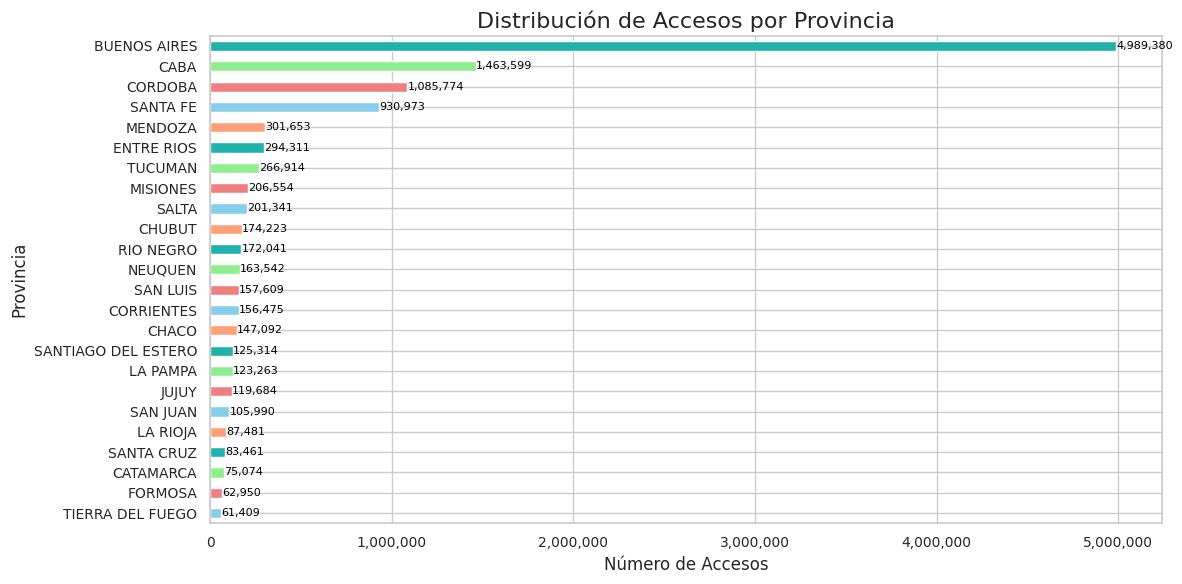

In [ ]:

import matplotlib.ticker as ticker
# Cargar los datos (asegúrate de que la ruta sea correcta)
xls = pd.ExcelFile('Internet_cleaned_renamed.xlsx')
h1 = pd.read_excel(xls, sheet_name='Acc_vel_loc_sinrangos')

# Agrupar por provincia y sumar los accesos
acceso_por_provincia = h1.groupby('Provincia')['Accesos'].sum().sort_values()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
ax = acceso_por_provincia.plot(kind='barh', color=['skyblue', 'lightcoral', 'lightgreen', 'lightseagreen', 'lightsalmon'])

# Formatear las etiquetas del eje x con separadores de miles
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Agregar etiquetas de datos en las barras
for i, v in enumerate(acceso_por_provincia):
    ax.text(v + 500, i, "{:,}".format(v), color='black', va='center', fontsize=8)  # Agregar coma como separador de miles


# Personalizar el gráfico
plt.title('Distribución de Accesos por Provincia', fontsize=16)
plt.xlabel('Número de Accesos', fontsize=12)
plt.ylabel('Provincia', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

####Interpretación del gráfico de barras:
-El gráfico muestra la distribución del número total de accesos a internet por provincia.
El numero de accesos esta representado en millones

# **1.6 Distribución de Accesos por Provincia (Top 50)**

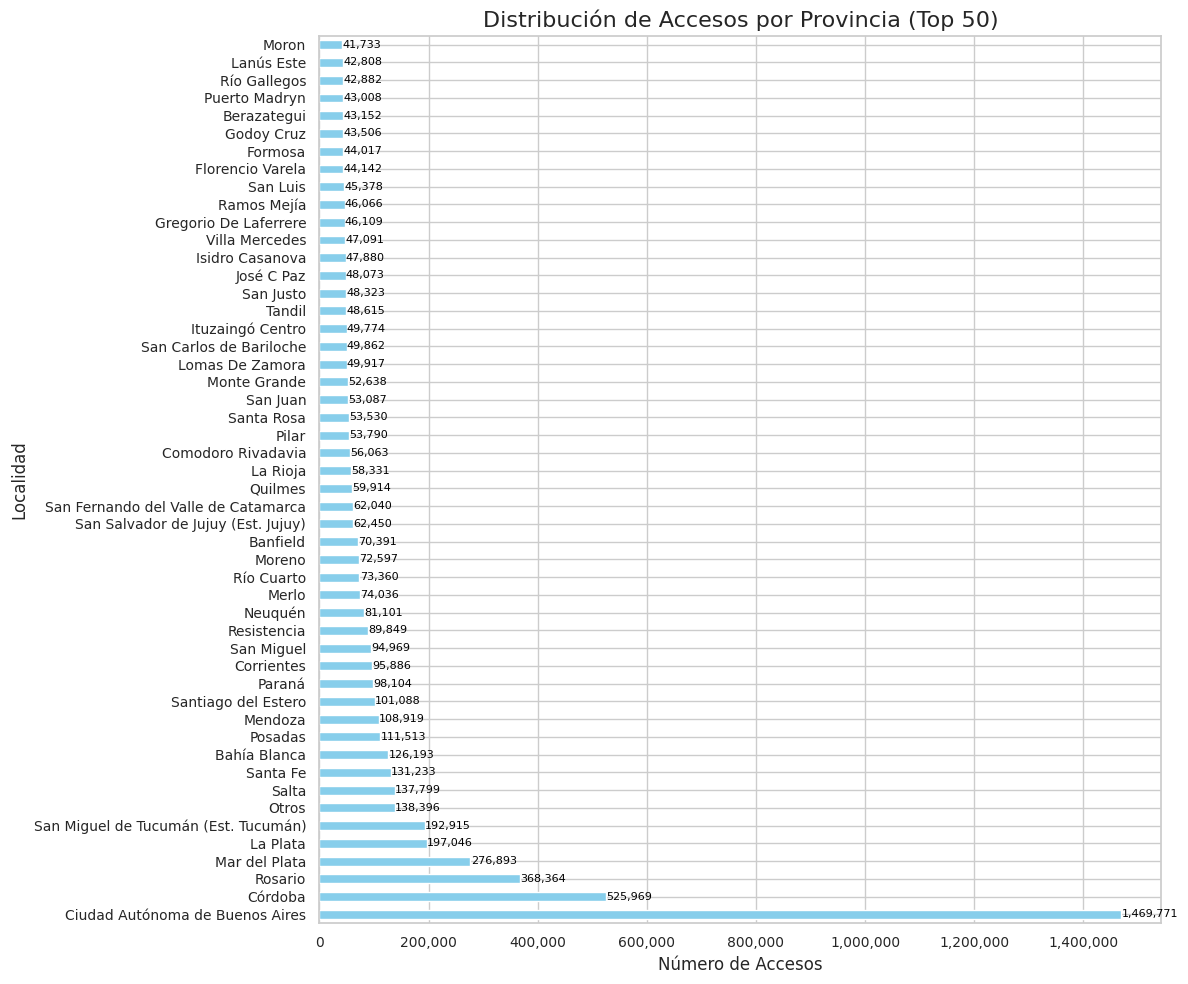

In [ ]:
import matplotlib.ticker as ticker

# Cargar los datos (asegúrate de que la ruta sea correcta)
xls = pd.ExcelFile('Internet_cleaned_renamed.xlsx')
h1 = pd.read_excel(xls, sheet_name='Acc_vel_loc_sinrangos')

# Agrupar por provincia y sumar los accesos
acceso_por_provincia = h1.groupby('Localidad')['Accesos'].sum().sort_values(ascending=False).head(50)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 10))  # Ajustar el tamaño de la figura para 50 localidades
ax = acceso_por_provincia.plot(kind='barh', color=['skyblue'])

# Formatear las etiquetas del eje x con separadores de miles
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Agregar etiquetas de datos en las barras
for i, v in enumerate(acceso_por_provincia):
    ax.text(v + 500, i, "{:,}".format(v), color='black', va='center', fontsize=8)  # Agregar coma como separador de miles

# Personalizar el gráfico
plt.title('Distribución de Accesos por Provincia (Top 50)', fontsize=16)
plt.xlabel('Número de Accesos', fontsize=12)
plt.ylabel('Localidad', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# **2. Velocidad_sin_Rangos**

## **2.1 Información general de dataset**
Información sobre la velocidad de conexión a internet sin rangos específicos a diferencia de la hoja 1.	Acc_vel_loc_sinrangos:  este cuenta con la informacion del Año y Trimestre por lo cual solo evaluaremos la velocidad en funcion al tiempo


In [ ]:
# Cargar el archivo Excel
xls = pd.ExcelFile('Internet_cleaned_no_duplicates.xlsx')

# Leer la hoja específica
h2 = pd.read_excel(xls, sheet_name='Velocidad_sin_Rangos')

# Mostrar las primeras filas del DataFrame
print(h2.head())


    Año  Trimestre     Provincia  Velocidad  Accesos
0  2024          2  BUENOS AIRES       75.0     1062
1  2024          2  BUENOS AIRES       59.0       59
2  2024          2  BUENOS AIRES      480.0        5
3  2024          2  BUENOS AIRES        3.5    41735
4  2024          2  BUENOS AIRES       18.0     1042


In [ ]:
# Obtener la forma de la hoja (número de filas y columnas)
print(h2.shape)

# Obtener los nombres de las columnas
print(h2.columns)

# Obtener los tipos de datos de cada columna
print(h2.dtypes)

(18884, 5)
Index(['Año', 'Trimestre', 'Provincia', 'Velocidad', 'Accesos'], dtype='object')
Año            int64
Trimestre      int64
Provincia     object
Velocidad    float64
Accesos        int64
dtype: object


### ** 1.7 Evolución de los Accesos para las 5 Velocidades más Comunes**

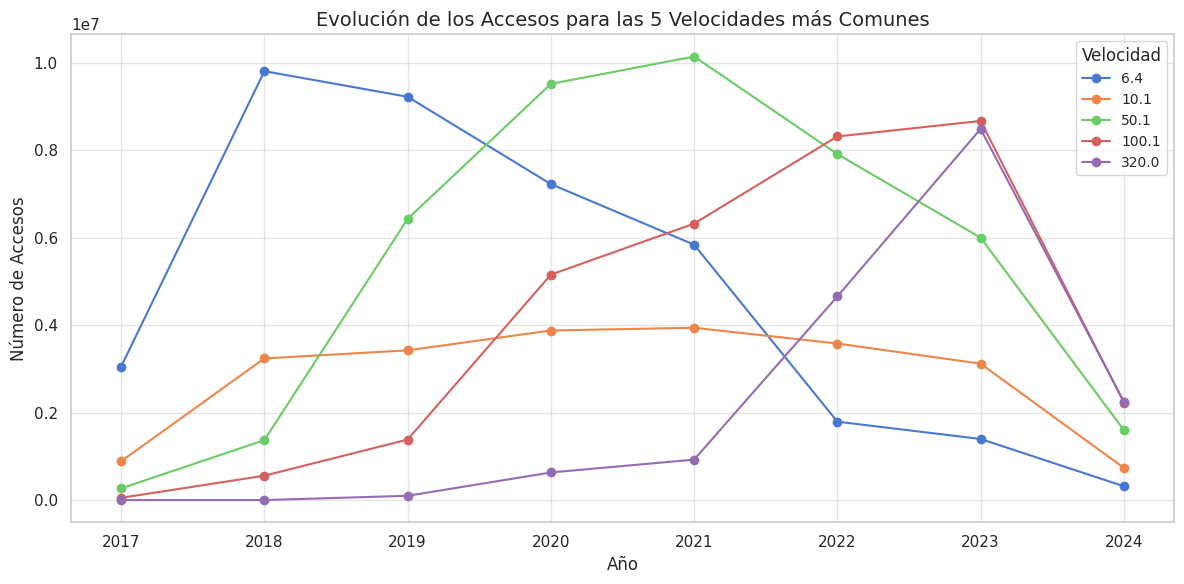

In [ ]:

# Calcular las 5 velocidades más comunes (con mayor número de accesos)
top_5_velocidades = (
    h2.groupby('Velocidad')['Accesos'].sum().sort_values(ascending=False).head(5).index
)

# Filtrar el dataset para incluir solo las 5 velocidades más comunes
filtro_top_5 = h2[h2['Velocidad'].isin(top_5_velocidades)]

# Crear un DataFrame con la evolución temporal de accesos para estas velocidades
evolucion_temporal = (
    filtro_top_5.groupby(['Año', 'Velocidad'])['Accesos']
    .sum()
    .unstack(fill_value=0)
)

# Graficar la evolución temporal
plt.figure(figsize=(12, 6))
evolucion_temporal.plot(marker='o', ax=plt.gca())  # Utilizamos el ax actual para mantener la figura
plt.title('Evolución de los Accesos para las 5 Velocidades más Comunes', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Accesos', fontsize=12)
plt.legend(title='Velocidad', fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


# **3. EDA Velocidad %por_prov**

## **3.1 Información GENERAL del dataset**

In [ ]:
# Leer la hoja "Velocidad _%_por_prov"
import pandas as pd

# Cargar el archivo Excel
xls = pd.ExcelFile('Internet_cleaned_no_duplicates.xlsx')

# Leer la hoja específica
h3 = pd.read_excel(xls, sheet_name='Velocidad _%_por_prov')

# Mostrar las primeras filas del DataFrame
print(h3.head())

    Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          2     Buenos Aires                  157.41
1  2024          2  Capital Federal                  233.01
2  2024          2        Catamarca                   97.38
3  2024          2            Chaco                  107.76
4  2024          2           Chubut                   21.67


In [ ]:
# Obtener la forma de la hoja (número de filas y columnas)
print(h3.shape)

# Obtener los nombres de las columnas
print(h3.columns)

# Obtener los tipos de datos de cada columna
print(h3.dtypes)

# Estadísticas descriptivas
print(h3.describe())

(1008, 4)
Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)'], dtype='object')
Año                         int64
Trimestre                   int64
Provincia                  object
Mbps (Media de bajada)    float64
dtype: object
               Año    Trimestre  Mbps (Media de bajada)
count  1008.000000  1008.000000             1008.000000
mean   2018.761905     2.452381               24.720245
std       3.039439     1.117574               33.660764
min    2014.000000     1.000000                2.573729
25%    2016.000000     1.000000                4.866698
50%    2019.000000     2.000000               10.089315
75%    2021.000000     3.000000               29.875292
max    2024.000000     4.000000              234.440000


# **3.2 Análisis Univariado**

# a. Distribución de la velocidad de internet por rangos

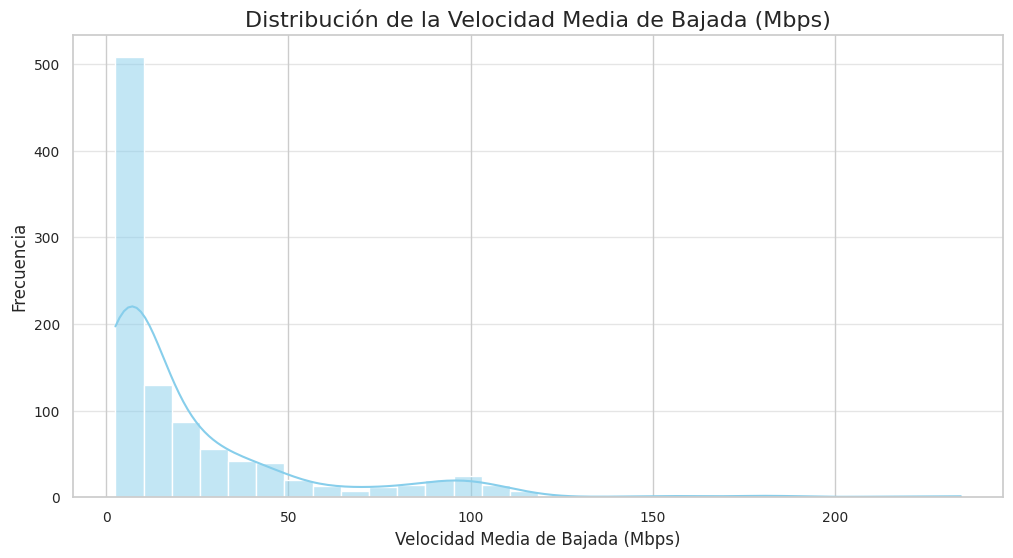

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(h3['Mbps (Media de bajada)'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la Velocidad Media de Bajada (Mbps)', fontsize=16)
plt.xlabel('Velocidad Media de Bajada (Mbps)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.5)  # Agregar cuadrícula solo en el eje y
plt.show()

# b. Distribución de la velocidad de internet por provincia

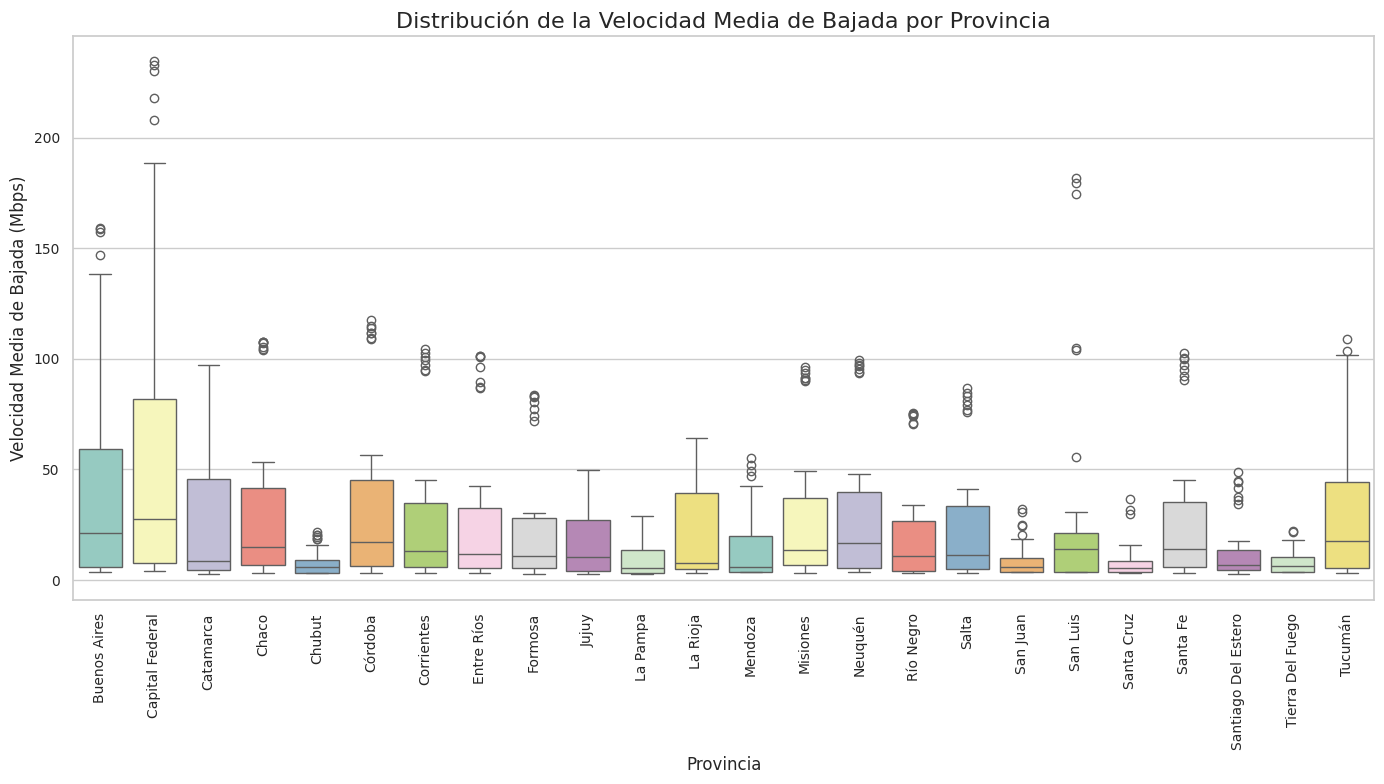

In [ ]:
# b. Distribución de la velocidad de internet por provincia
plt.figure(figsize=(14, 8))
sns.boxplot(x='Provincia', y='Mbps (Media de bajada)', data=h3, palette="Set3")
plt.title('Distribución de la Velocidad Media de Bajada por Provincia', fontsize=16)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Velocidad Media de Bajada (Mbps)', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# c. Análisis de valores atípicos en la velocidad de internet

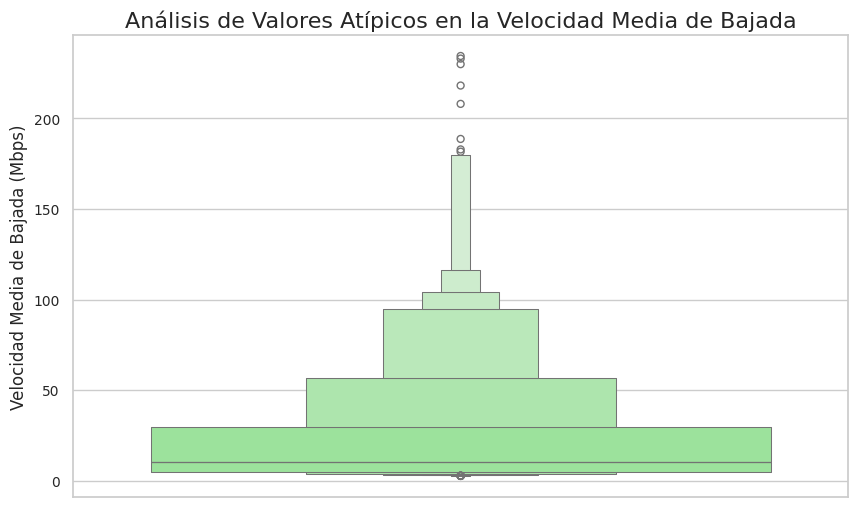

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxenplot(y='Mbps (Media de bajada)', data=h3, color='lightgreen')
plt.title('Análisis de Valores Atípicos en la Velocidad Media de Bajada', fontsize=16)
plt.ylabel('Velocidad Media de Bajada (Mbps)', fontsize=12)
plt.yticks(fontsize=10)
plt.show()

# **4.3 Análisis Bivariado**

# a. Relación entre el año y la velocidad media de bajada

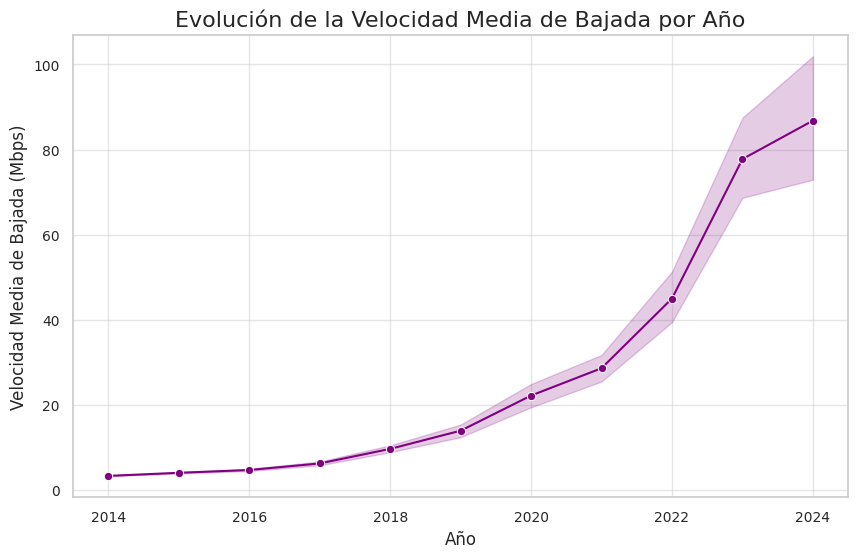

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=h3, marker='o', color='purple')
plt.title('Evolución de la Velocidad Media de Bajada por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Velocidad Media de Bajada (Mbps)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.5)
plt.show()

# b. Relación entre el trimestre y la velocidad media de bajada

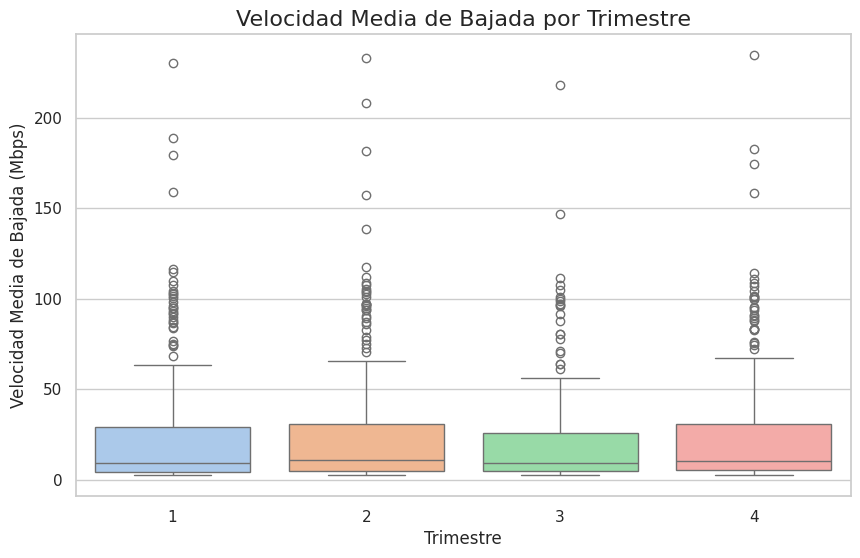

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Trimestre', y='Mbps (Media de bajada)', data=h3, palette='pastel')
plt.title('Velocidad Media de Bajada por Trimestre', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Velocidad Media de Bajada (Mbps)', fontsize=12)
plt.show()

# **4. accesos_por_tecnología**

## **4.1 Información general del dataset**

In [ ]:
# Cargar el archivo Excel
xls = pd.ExcelFile('Internet_cleaned_no_duplicates.xlsx')

# Leer la hoja específica
h4 = pd.read_excel(xls, sheet_name='accesos_por_tecnología')

# Mostrar las primeras filas del DataFrame
print(h4.head())

    Año Trimestre        Provincia    ADSL  Cablemodem  Fibra óptica  \
0  2024         2     Buenos Aires  214055     2722466       1849476   
1  2024         2  Capital Federal   54102     1144781        230402   
2  2024         2        Catamarca    4951       10303         58355   
3  2024         2            Chaco    9448       57935         68944   
4  2024         2           Chubut   25955       80704         26516   

   Wireless  Otros    Total  
0    138638  64745  4989380  
1      4493  29821  1463599  
2      1384     81    75074  
3      8407   2358   147092  
4     31118   9930   174223  


In [ ]:
4# Obtener la forma de la hoja (número de filas y columnas)
print(h4.shape)

# Obtener los nombres de las columnas
print(h4.columns)

# Obtener los tipos de datos de cada columna
print(h4.dtypes)

# Estadísticas descriptivas
print(h4.describe())

(1009, 9)
Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')
Año             object
Trimestre       object
Provincia       object
ADSL             int64
Cablemodem       int64
Fibra óptica     int64
Wireless         int64
Otros            int64
Total            int64
dtype: object
               ADSL    Cablemodem  Fibra óptica       Wireless         Otros  \
count  1.009000e+03  1.009000e+03  1.009000e+03    1009.000000   1009.000000   
mean   1.127070e+05  1.817972e+05  4.846074e+04   12517.368682   6484.163528   
std    2.361111e+05  4.456368e+05  1.757081e+05   20896.113852  11232.420316   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000      0.000000   
25%    1.978900e+04  1.101200e+04  3.540000e+02     812.000000    332.000000   
50%    4.396400e+04  4.040700e+04  3.014000e+03    5203.000000   1882.000000   
75%    8.654800e+04  7.642700e+04  2.911800e+04   14292.000000   7545.0

# 4.2 Análisis de la distribución de accesos por tecnología en cada provincia

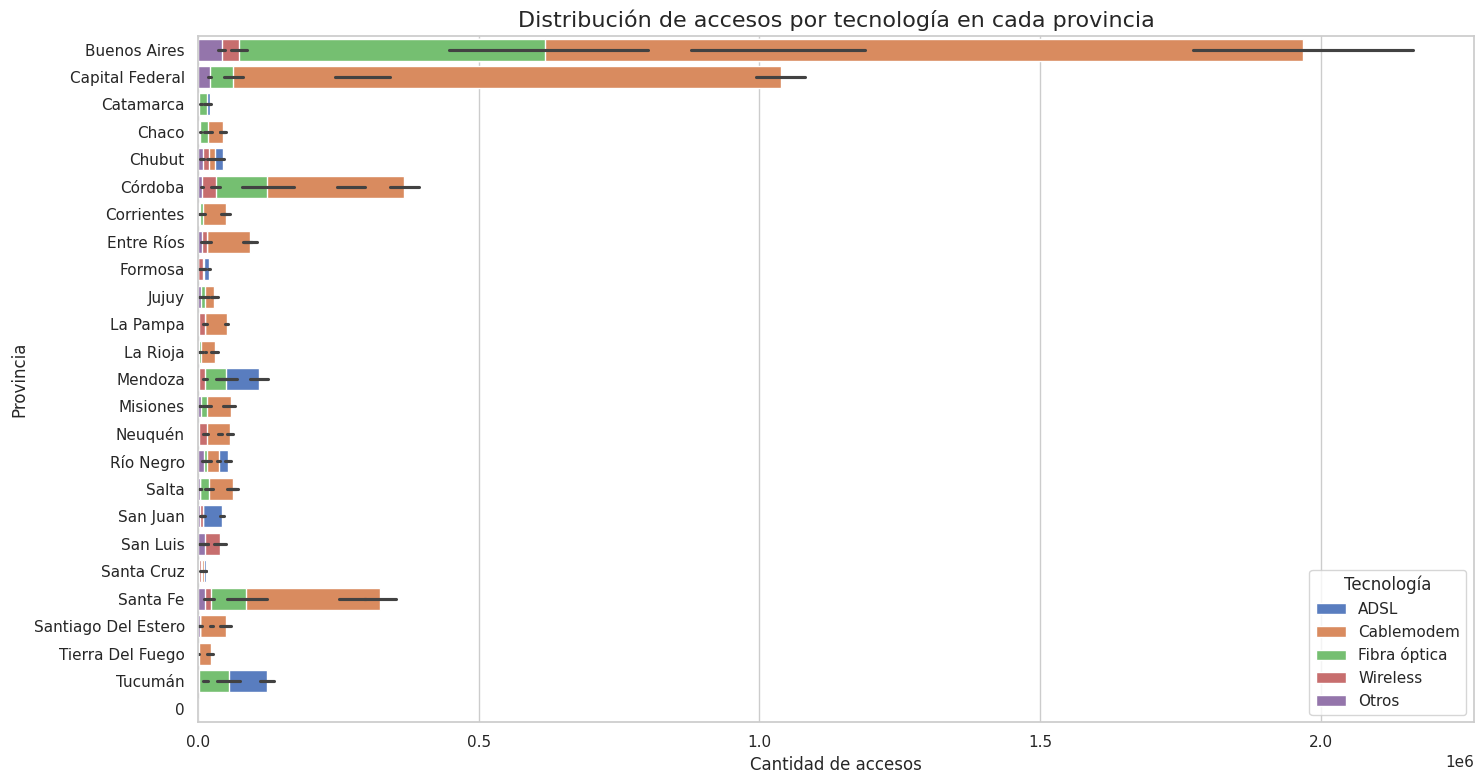

In [ ]:
plt.figure(figsize=(15, 8))
for col in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
    sns.barplot(y='Provincia', x=col, data=h4, label=col, orient='h')  # Cambiar a barras horizontales
plt.title('Distribución de accesos por tecnología en cada provincia', fontsize=16)
plt.ylabel('Provincia', fontsize=12)
plt.xlabel('Cantidad de accesos', fontsize=12)
plt.legend(title='Tecnología')
plt.tight_layout()
plt.show()


# 4.3 Análisis de la relación entre el total de accesos y las diferentes tecnologías

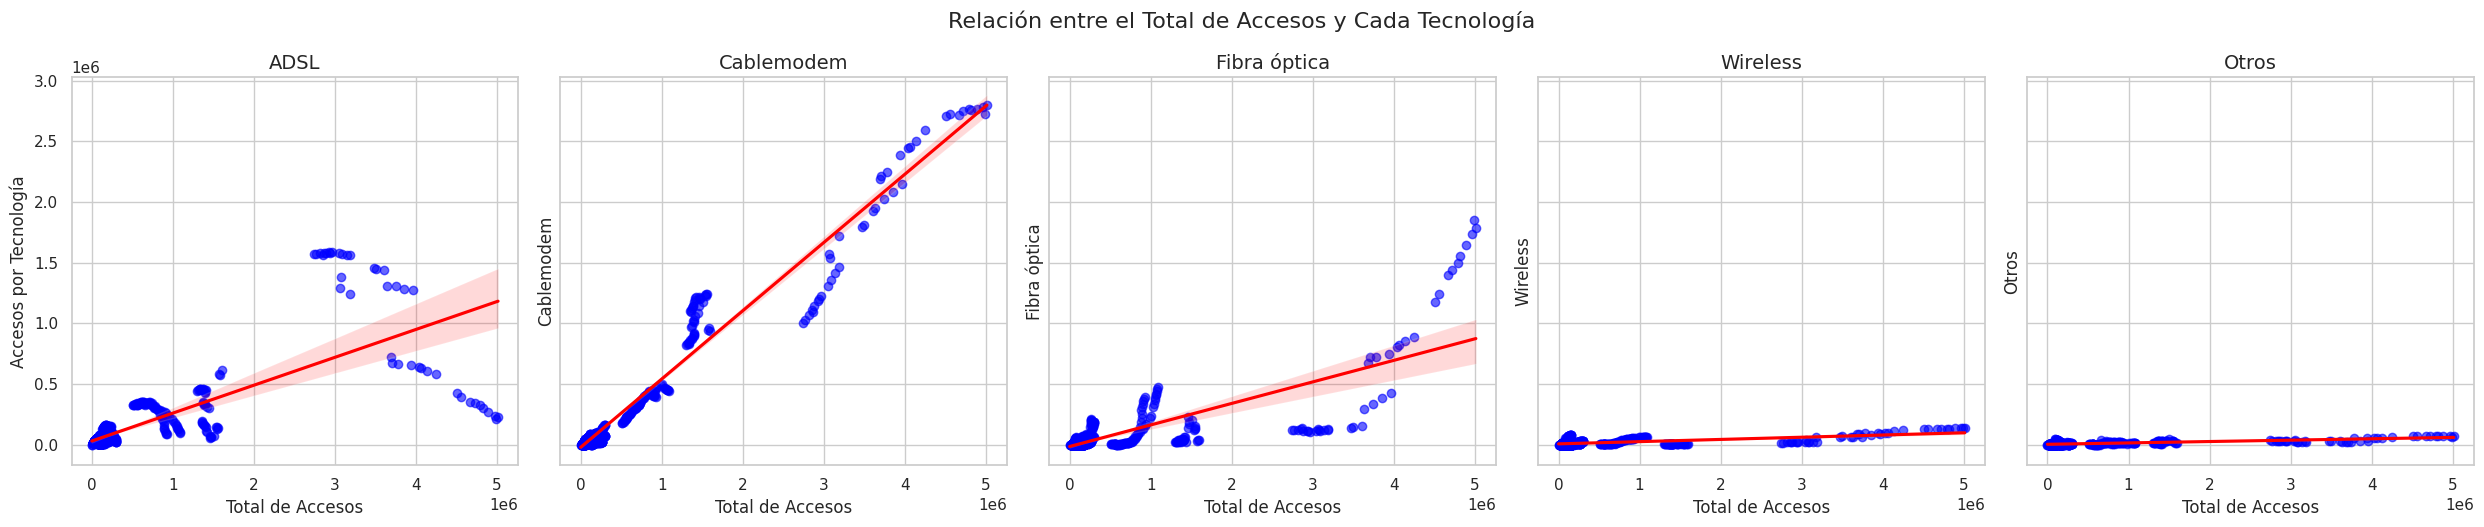

In [ ]:
# Lista de tecnologías
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Crear figura con subgráficos
fig, axes = plt.subplots(nrows=1, ncols=len(tecnologias), figsize=(25, 5), sharey=True)

# Crear un subgráfico para cada tecnología
for i, tecnologia in enumerate(tecnologias):
    sns.regplot(
        x='Total',
        y=tecnologia,
        data=h4,
        ax=axes[i],
        scatter_kws={'alpha': 0.6, 'color': 'blue'},  # Configuración de puntos
        line_kws={'color': 'red'},  # Configuración de la línea de tendencia
    )
    axes[i].set_title(tecnologia, fontsize=14)
    axes[i].set_xlabel('Total de Accesos', fontsize=12)
    if i == 0:  # Solo el primer subgráfico tiene etiqueta para el eje y
        axes[i].set_ylabel('Accesos por Tecnología', fontsize=12)

# Ajustar espaciado
plt.tight_layout()
plt.suptitle('Relación entre el Total de Accesos y Cada Tecnología', fontsize=16, y=1.05)
plt.show()



## **4.4 Distribución de accesos por tecnología**

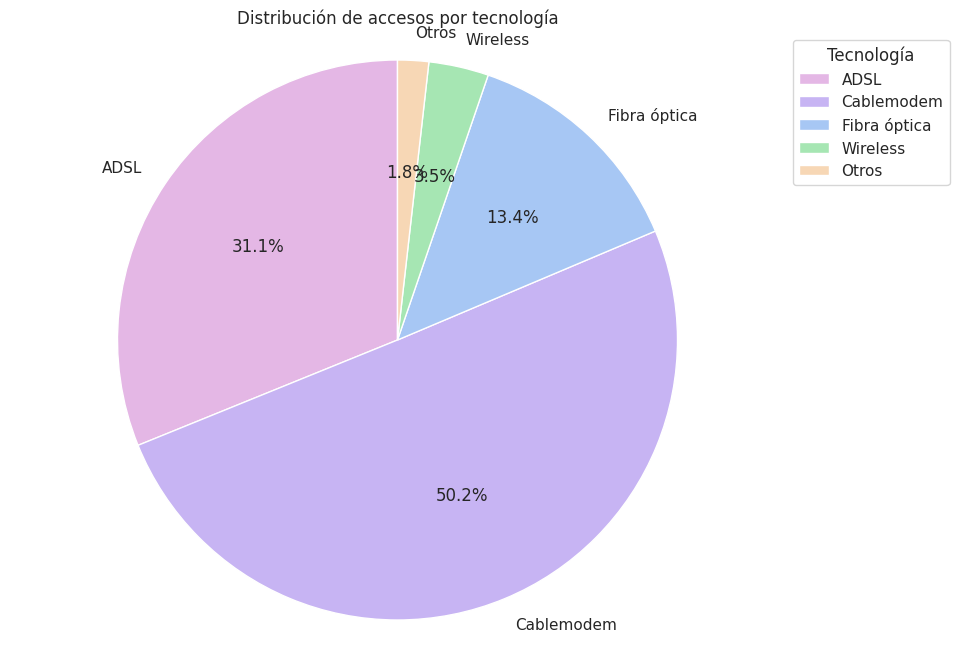

In [ ]:
# Cargar el archivo Excel (asegúrate de que la ruta sea correcta)
xls = pd.ExcelFile('Internet_cleaned_no_duplicates.xlsx')
h4 = pd.read_excel(xls, sheet_name='accesos_por_tecnología')

# Calcular los totales de cada tecnología
tecnologia_totals = h4[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Colores pastel alternativos
pastel_colors_alt = ['#e4b7e5', '#c7b4f3', '#a7c7f4', '#a6e6b3', '#f7d7b5']

# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
plt.pie(tecnologia_totals, labels=tecnologia_totals.index, autopct='%1.1f%%', startangle=90, colors=pastel_colors_alt)

# Título
plt.title('Distribución de accesos por tecnología')

# Leyenda
plt.legend(tecnologia_totals.index, title="Tecnología", loc="upper left", bbox_to_anchor=(1, 1))

# Asegurarse de que el gráfico sea un círculo
plt.axis('equal')

# Mostrar gráfico
plt.show()


# **4.5 Análisis de la proporción de cada tecnología a lo largo del tiempo**

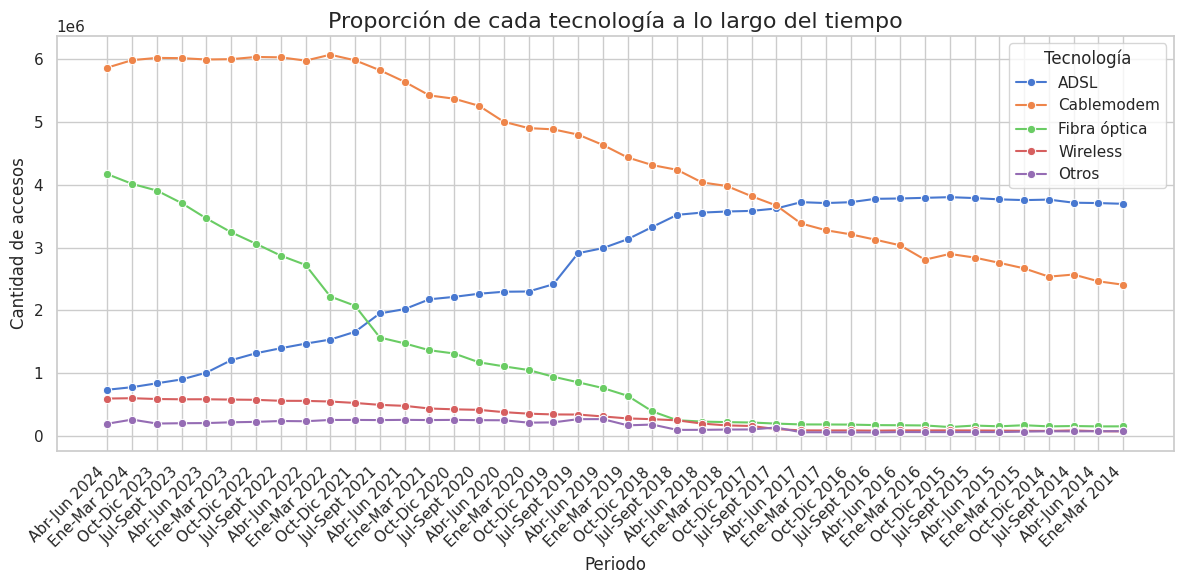

In [ ]:
# Cargar el archivo Excel
xls = pd.ExcelFile('Internet_cleaned_no_duplicates.xlsx')

# Leer la hoja específica
h4a = pd.read_excel(xls, sheet_name='Totales_accesos _por_tecnología')

h6_melted = h4a.melt(id_vars=['Año', 'Trimestre', 'Periodo', 'Total'],
                   value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'],
                   var_name='Tecnología', value_name='Cantidad')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Periodo', y='Cantidad', hue='Tecnología', data=h6_melted, marker='o')
plt.title('Proporción de cada tecnología a lo largo del tiempo', fontsize=16)
plt.xlabel('Periodo', fontsize=12)
plt.ylabel('Cantidad de accesos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4.6 Análisis de la tendencia de accesos totales a lo largo del tiempo

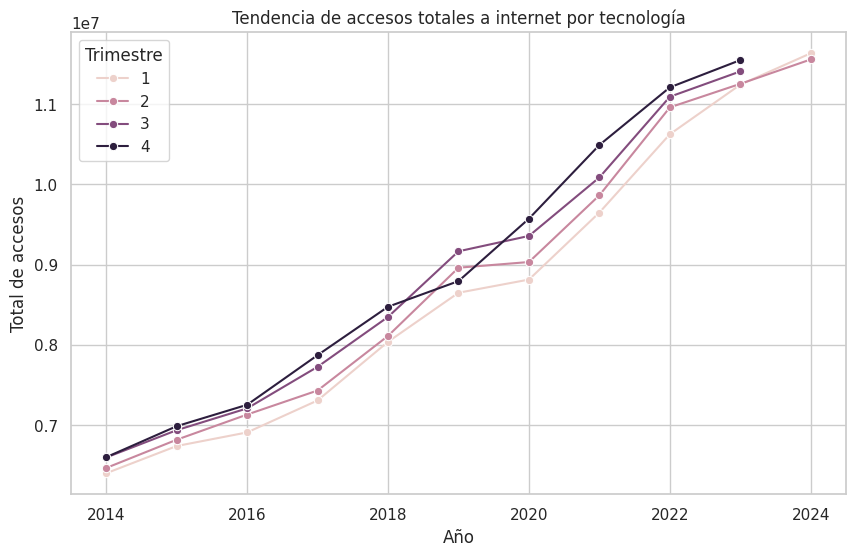

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Total', data=h4a, marker='o', hue='Trimestre')
plt.title('Tendencia de accesos totales a internet por tecnología')
plt.xlabel('Año')
plt.ylabel('Total de accesos')
plt.show()

# **4.7 Análisis de correlación entre las diferentes tecnologías**

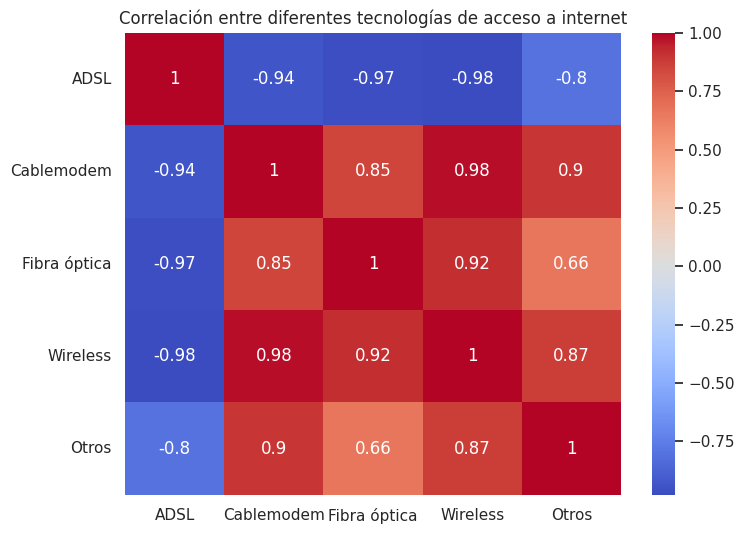

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(h4a[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre diferentes tecnologías de acceso a internet')
plt.show()

# **5. Penetración_poblacion**

## **5.1 Información general del dataset**

In [92]:
# Leer la hoja "Penetración_poblacion"
import pandas as pd

# Cargar el archivo Excel
xls = pd.ExcelFile('Internet_cleaned_no_duplicates.xlsx')

# Leer la hoja específica
h5 = pd.read_excel(xls, sheet_name='Penetración_poblacion')

# Mostrar las primeras filas del DataFrame
print(h5.head())

    Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2024          2     Buenos Aires                     27.43
1  2024          2  Capital Federal                     47.44
2  2024          2        Catamarca                     17.50
3  2024          2            Chaco                     11.78
4  2024          2           Chubut                     26.46


In [93]:
# Obtener la forma de la hoja (número de filas y columnas)
print(h5.shape)

# Obtener los nombres de las columnas
print(h5.columns)

# Obtener los tipos de datos de cada columna
print(h5.dtypes)

# Estadísticas descriptivas
print(h5.describe())

(1000, 4)
Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab'], dtype='object')
Año                           int64
Trimestre                     int64
Provincia                    object
Accesos por cada 100 hab    float64
dtype: object
               Año    Trimestre  Accesos por cada 100 hab
count  1000.000000  1000.000000               1000.000000
mean   2018.800000     2.464000                 15.727248
std       3.021445     1.114426                  9.240063
min    2014.000000     1.000000                  2.723000
25%    2016.000000     1.000000                  9.018188
50%    2019.000000     2.000000                 13.674812
75%    2021.000000     3.000000                 20.323973
max    2024.000000     4.000000                 52.236739


## **5.2 Análisis de la distribución de 'Accesos por cada 100 hab'**

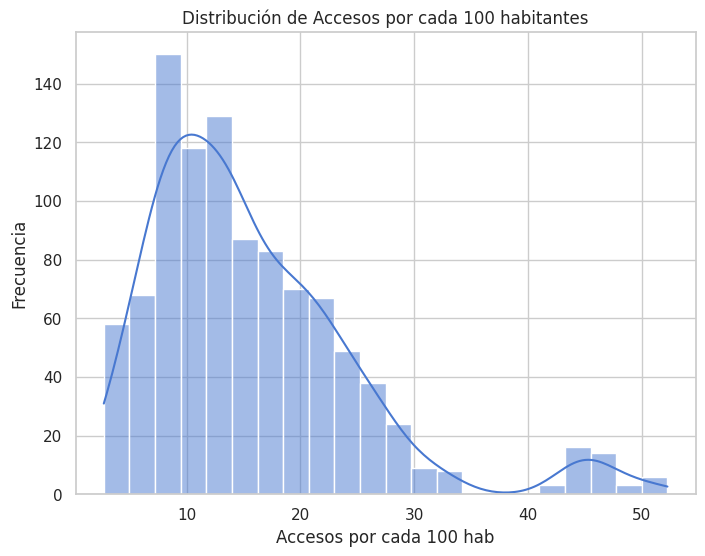

In [94]:
plt.figure(figsize=(8, 6))
sns.histplot(h5['Accesos por cada 100 hab'], kde=True)
plt.title('Distribución de Accesos por cada 100 habitantes')
plt.xlabel('Accesos por cada 100 hab')
plt.ylabel('Frecuencia')
plt.show()

# 5.3 Análisis de la relación entre 'Trimestre' y 'Accesos por cada 100 hab'

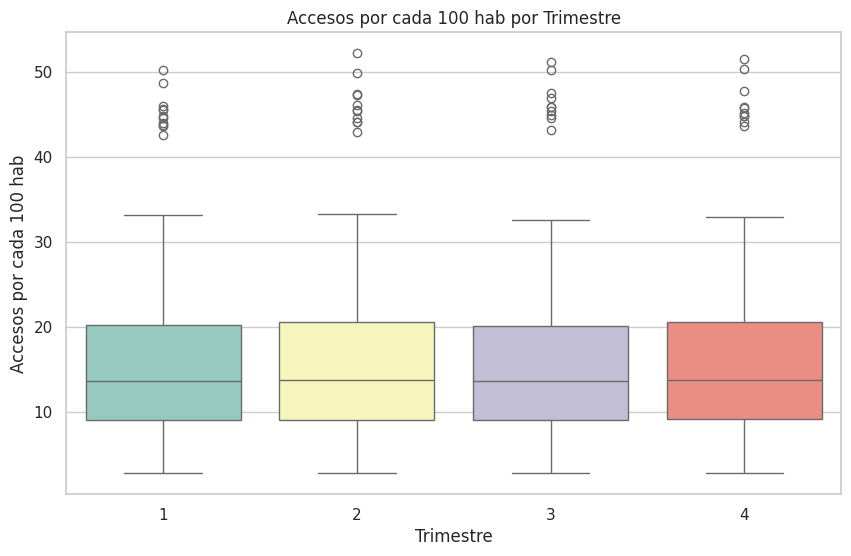

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Trimestre', y='Accesos por cada 100 hab', data=h5, palette='Set3')
plt.title('Accesos por cada 100 hab por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hab')
plt.show()

# 5.4 **Análisis de la relación entre 'Año' y 'Accesos por cada 100 hab**

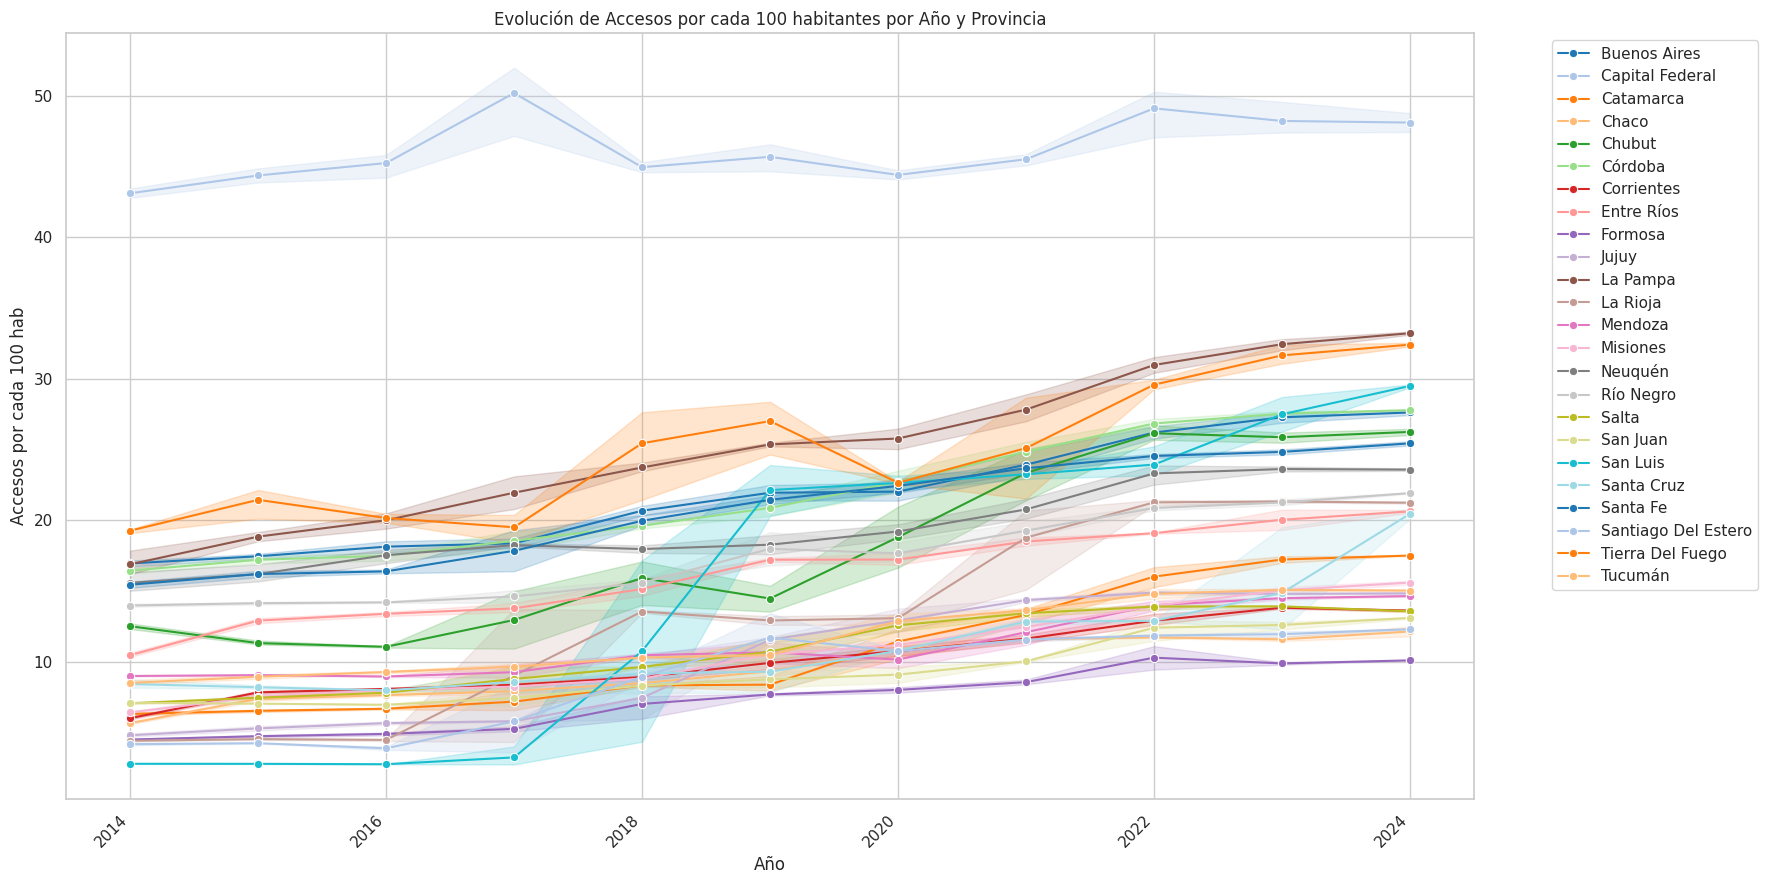

In [96]:
plt.figure(figsize=(15, 9))
sns.lineplot(
    x='Año',
    y='Accesos por cada 100 hab',
    data=h5,
    marker='o',
    hue='Provincia',
    palette='tab20'
)
plt.title('Evolución de Accesos por cada 100 habitantes por Año y Provincia')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hab')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mueve la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()




# **6. Penetracion_hogares**

## **6.1 Información general del dataset**

In [98]:
# Cargar el archivo Excel
xls = pd.ExcelFile('Internet_cleaned_no_duplicates.xlsx')
# Leer la hoja específica
h6 = pd.read_excel(xls, sheet_name='Penetracion_hogares')

# Mostrar las primeras filas del DataFrame
print(h6.head())


    Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2024          2     Buenos Aires                         79.84
1  2024          2  Capital Federal                        116.37
2  2024          2        Catamarca                         68.81
3  2024          2            Chaco                         44.06
4  2024          2           Chubut                         86.33


## **6.1 Información general del dataset**

In [100]:
# Obtener la forma de la hoja (número de filas y columnas)
print(h6.shape)

# Obtener los nombres de las columnas
print(h6.columns)

# Obtener los tipos de datos de cada columna
print(h6.dtypes)

# Estadísticas descriptivas
print(h6.describe())

(1000, 4)
Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')
Año                               int64
Trimestre                         int64
Provincia                        object
Accesos por cada 100 hogares    float64
dtype: object
               Año    Trimestre  Accesos por cada 100 hogares
count  1000.000000  1000.000000                   1000.000000
mean   2018.800000     2.464000                     52.794973
std       3.021445     1.114426                     24.135063
min    2014.000000     1.000000                      9.513970
25%    2016.000000     1.000000                     33.957657
50%    2019.000000     2.000000                     50.133004
75%    2021.000000     3.000000                     67.010861
max    2024.000000     4.000000                    124.061394


# **6.2 Análisis de la distribución de 'Accesos por cada 100 hogares**

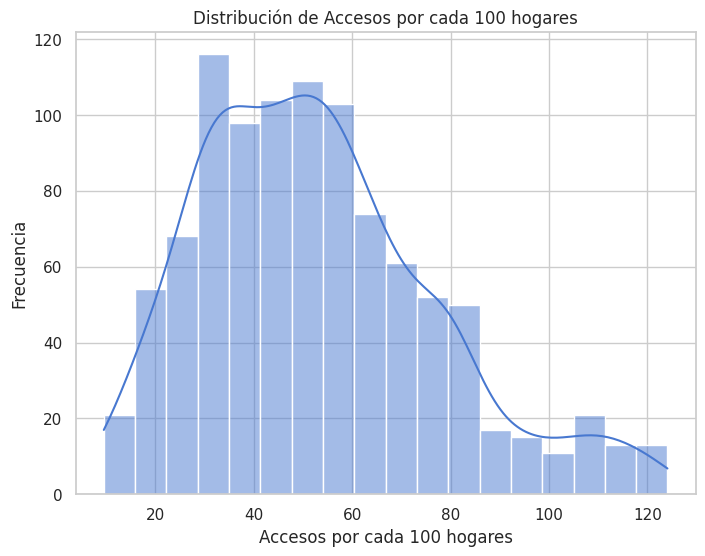

In [101]:
plt.figure(figsize=(8, 6))
sns.histplot(h6['Accesos por cada 100 hogares'], kde=True)
plt.title('Distribución de Accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.show()

# **6.3 Análisis de la relación entre 'Trimestre' y 'Accesos por cada 100 hogares**

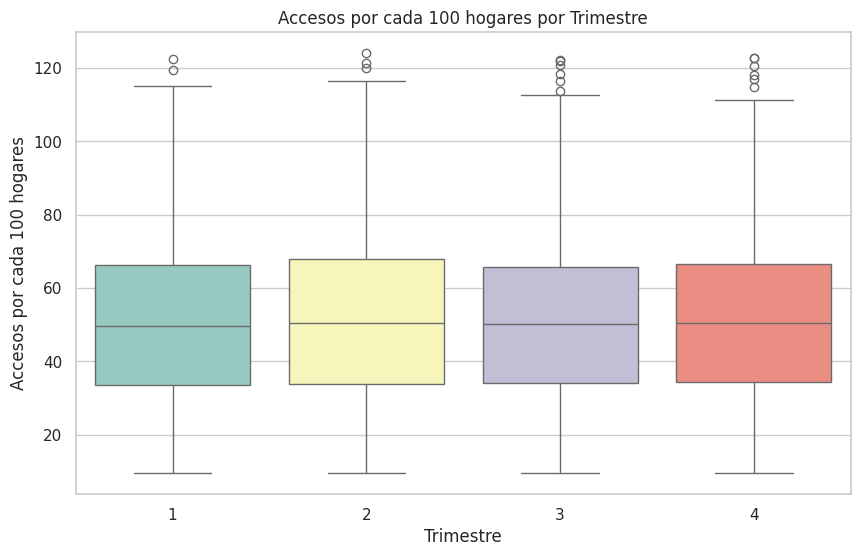

In [102]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Trimestre', y='Accesos por cada 100 hogares', data=h6, palette='Set3')
plt.title('Accesos por cada 100 hogares por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hogares')
plt.show()

 ## 6.4 Gráfico de burbujas Relación entre Año, Provincia y Accesos por cada 100 hogares

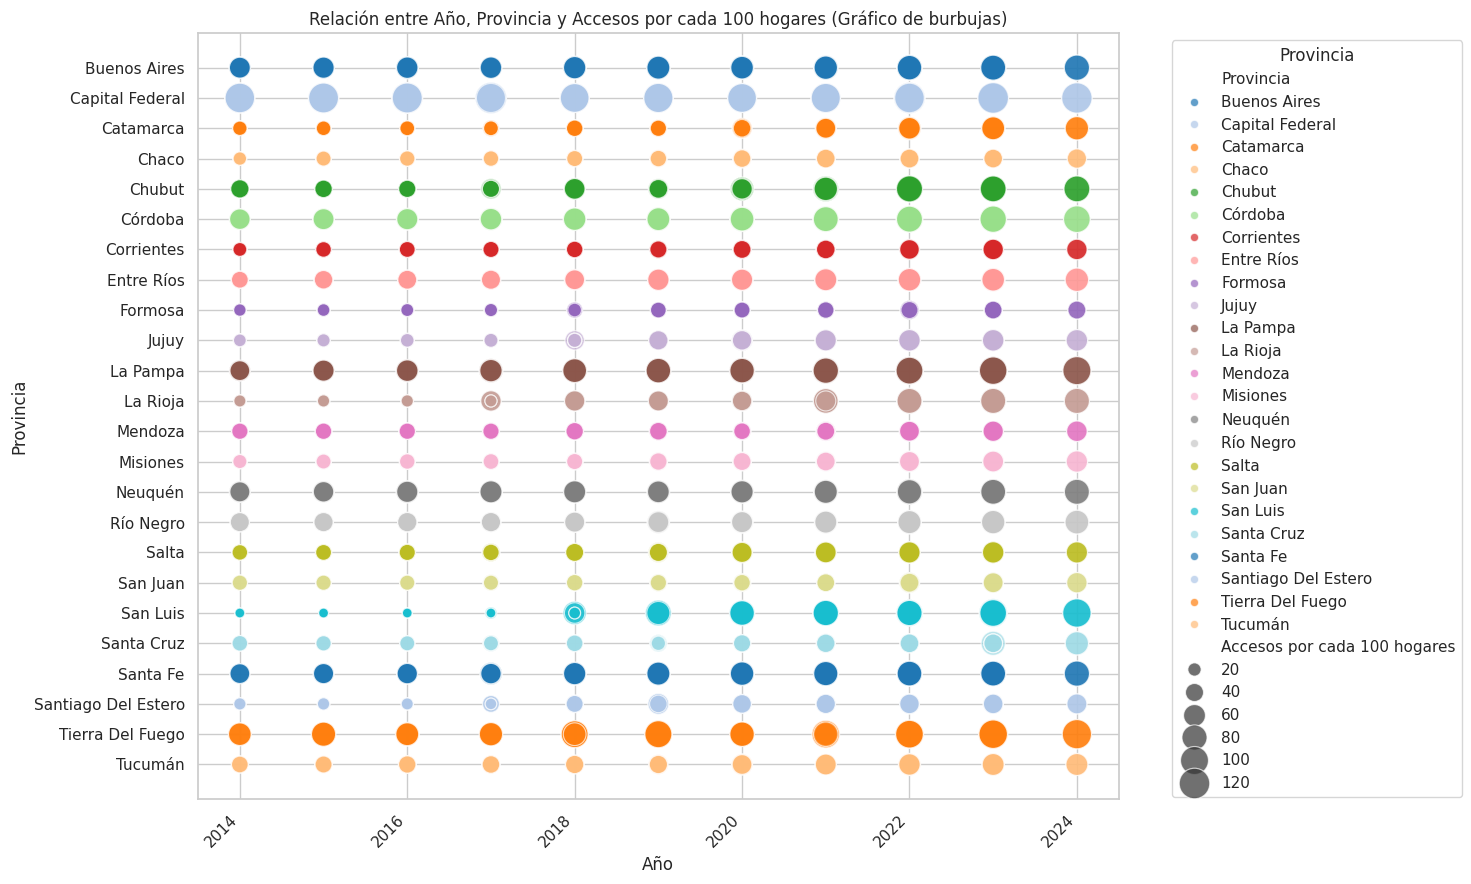

In [104]:
plt.figure(figsize=(15, 9))
sns.scatterplot(
    x='Año',
    y='Provincia',
    size='Accesos por cada 100 hogares',
    hue='Provincia',
    data=h6,
    alpha=0.7,
    sizes=(50, 500),
    palette='tab20'
)
plt.title('Relación entre Año, Provincia y Accesos por cada 100 hogares (Gráfico de burbujas)')
plt.xlabel('Año')
plt.ylabel('Provincia')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Provincia')
plt.tight_layout()
plt.show()



## 6.5 Mapa de calor de Accesos por cada 100 hogares por Año y Provincia

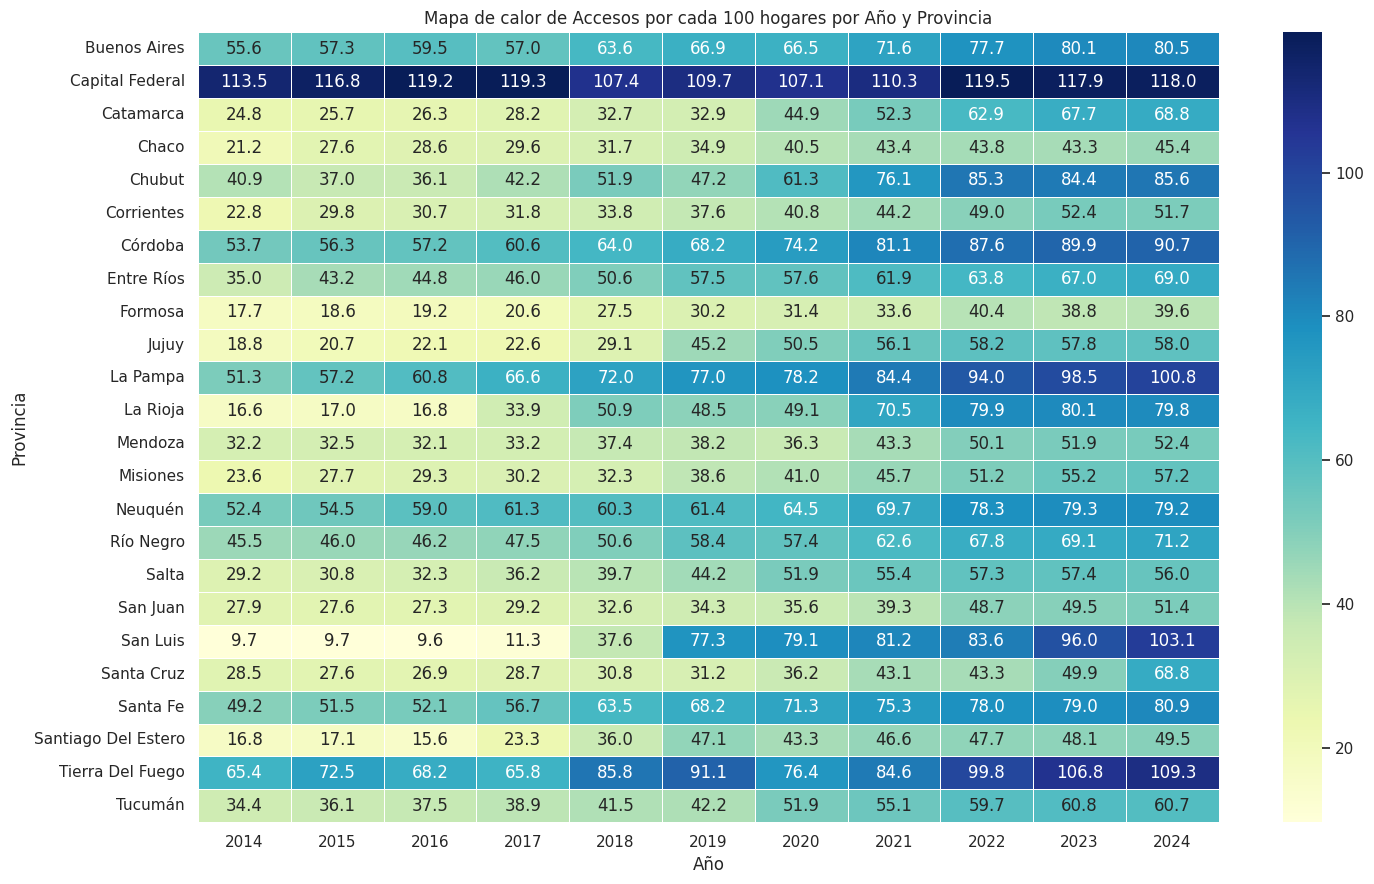

In [105]:
pivot_data = h6.pivot_table(
    index='Provincia',
    columns='Año',
    values='Accesos por cada 100 hogares',
    aggfunc='mean'  # Usa 'mean' o 'sum' si hay duplicados
)

plt.figure(figsize=(15, 9))
sns.heatmap(
    pivot_data,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=0.5
)
plt.title('Mapa de calor de Accesos por cada 100 hogares por Año y Provincia')
plt.xlabel('Año')
plt.ylabel('Provincia')
plt.tight_layout()
plt.show()


# **7. Penetracion_totales**

## **7.1 Información básica del dataset**

In [106]:
# Cargar el archivo Excel
xls = pd.ExcelFile('Internet_cleaned_no_duplicates.xlsx')

# Leer la hoja específica
h7 = pd.read_excel(xls, sheet_name='Penetracion_totales')

# Mostrar las primeras filas del DataFrame
print(h7.head())

    Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2024          2                         78.13                     24.57   
1  2024          1                         78.89                     24.79   
2  2023          4                         78.56                     24.66   
3  2023          3                         77.84                     24.41   
4  2023          2                         77.02                     24.14   

         Periodo  
0   Abr-Jun 2024  
1   Ene-Mar 2024  
2   Oct-Dic 2023  
3  Jul-Sept 2023  
4   Abr-Jun 2023  


In [107]:
# Obtener la forma de la hoja (número de filas y columnas)
print(h7.shape)

# Obtener los nombres de las columnas
print(h7.columns)

# Obtener los tipos de datos de cada columna
print(h7.dtypes)

# Estadísticas descriptivas
print(h7.describe())

(42, 5)
Index(['Año', 'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'Periodo'],
      dtype='object')
Año                               int64
Trimestre                         int64
Accesos por cada 100 hogares    float64
Accesos por cada 100 hab        float64
Periodo                          object
dtype: object
               Año  Trimestre  Accesos por cada 100 hogares  \
count    42.000000  42.000000                     42.000000   
mean   2018.761905   2.452381                     63.201813   
std       3.074756   1.130560                      9.950321   
min    2014.000000   1.000000                     49.545821   
25%    2016.000000   1.250000                     53.784644   
50%    2019.000000   2.000000                     62.667764   
75%    2021.000000   3.000000                     72.527011   
max    2024.000000   4.000000                     78.890000   

       Accesos por cada 100 hab  
count                 42.000000  
mean          

## **7.5 Análisis por períodos Promedio de accesos por período**

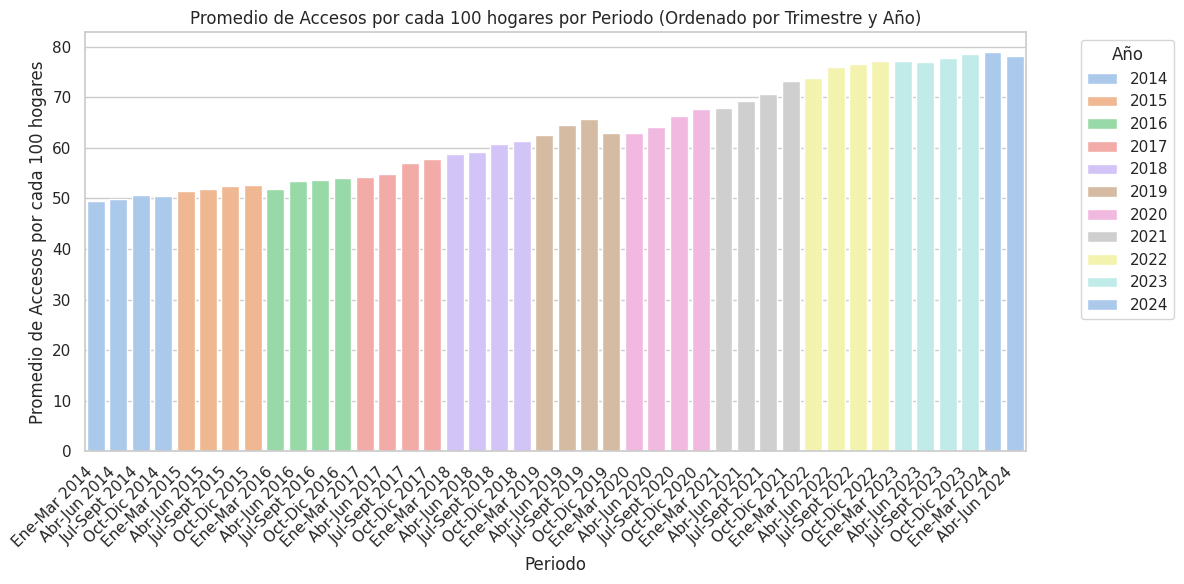

In [109]:
# Crear una columna que extraiga el año del período
h7['Año_Periodo'] = h7['Periodo'].str.extract(r'(\d{4})')

# Crear una columna que asigne un orden numérico a los trimestres
trimestre_orden = {
    'Ene-Mar': 1,
    'Abr-Jun': 2,
    'Jul-Sept': 3,
    'Oct-Dic': 4
}
h7['Orden_Trimestre'] = h7['Periodo'].str.extract(r'(Ene-Mar|Abr-Jun|Jul-Sept|Oct-Dic)')[0].map(trimestre_orden)

# Calcular el promedio por período
period_mean = h7.groupby(['Periodo', 'Año_Periodo', 'Orden_Trimestre'])['Accesos por cada 100 hogares'].mean().reset_index()

# Ordenar los períodos por año y trimestre
period_mean = period_mean.sort_values(['Año_Periodo', 'Orden_Trimestre'])

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Periodo',
    y='Accesos por cada 100 hogares',
    hue='Año_Periodo',
    data=period_mean,
    palette='pastel'
)

# Personalizar el gráfico
plt.title('Promedio de Accesos por cada 100 hogares por Periodo (Ordenado por Trimestre y Año)')
plt.xlabel('Periodo')
plt.ylabel('Promedio de Accesos por cada 100 hogares')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#7.6  Análisis de la tendencia de 'Accesos por cada 100 hogares' y 'Accesos por cada 100 hab'

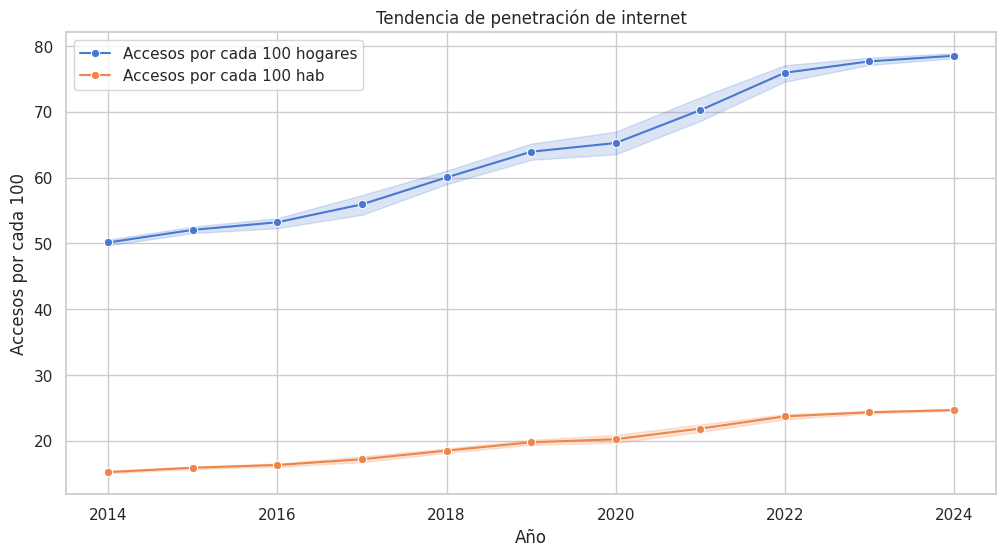

In [110]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=h7, marker='o', label='Accesos por cada 100 hogares')
sns.lineplot(x='Año', y='Accesos por cada 100 hab', data=h7, marker='o', label='Accesos por cada 100 hab')
plt.title('Tendencia de penetración de internet')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100')
plt.legend()
plt.show()

# **8. Accesos_por_rangos**

## **8.1 Información general del dataset**

In [128]:
# Leer la hoja "Totales_Accesos_por_rango"
import pandas as pd

# Cargar el archivo Excel
xls = pd.ExcelFile('Internet_cleaned_no_duplicates.xlsx')

# Leer la hoja específica
h8 = pd.read_excel(xls, sheet_name='Totales_Accesos_por_rango')

# Mostrar las primeras filas del DataFrame
print(h8.head())

    Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  2024          2           28151                    67024   
1  2024          1           28801                    69355   
2  2023          4           29708                    71742   
3  2023          3           30274                    80609   
4  2023          2           30827                    79405   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                 840200                  911374                   662649   
1                 866152                  950930                   672155   
2                 900253                  978108                   697232   
3                 945608                  998725                   720084   
4                 963510                 1028250                   734125   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps   OTROS     Total  
0                   348253         8357088  341368  11556107  
1                   353896      

In [129]:
# Obtener la forma de la hoja (número de filas y columnas)
print(h8.shape)

# Obtener los nombres de las columnas
print(h8.columns)

# Obtener los tipos de datos de cada columna
print(h8.dtypes)

# Estadísticas descriptivas
print(h8.describe())

(42, 11)
Index(['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total'],
      dtype='object')
Año                        int64
Trimestre                  int64
Hasta 512 kbps             int64
Entre 512 Kbps y 1 Mbps    int64
Entre 1 Mbps y 6 Mbps      int64
Entre 6 Mbps y 10 Mbps     int64
Entre 10 Mbps y 20 Mbps    int64
Entre 20 Mbps y 30 Mbps    int64
Más de 30 Mbps             int64
OTROS                      int64
Total                      int64
dtype: object
               Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
count    42.000000  42.000000       42.000000                42.000000   
mean   2018.761905   2.452381    46756.595238            215615.285714   
std       3.074756   1.130560    48922.973593            192134.704593   
min    2014.000000   1.000000     5675.000000             285

# 8.2 Análisis de la distribución de accesos por rango de velocidad

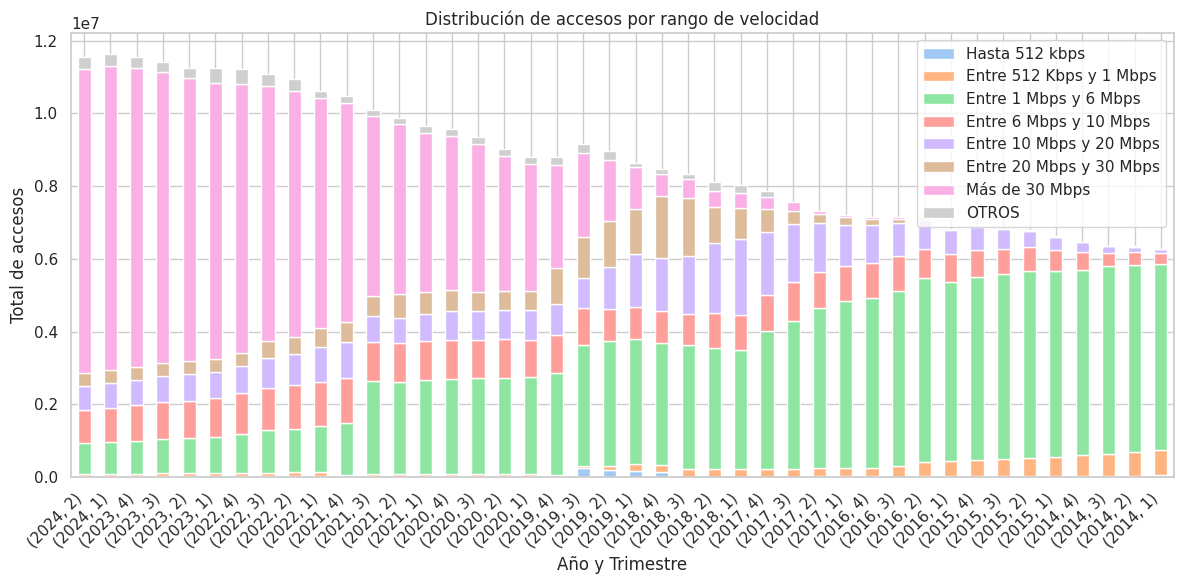

In [131]:
# Crea un nuevo DataFrame con los rangos de velocidad como columnas y los totales como valores
rango_velocidad = h8.set_index(['Año', 'Trimestre'])[[
    'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps',
    'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps',
    'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'OTROS'
]]

# Crea el gráfico
rango_velocidad.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de accesos por rango de velocidad')
plt.xlabel('Año y Trimestre')
plt.ylabel('Total de accesos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 8.3 Análisis de la tendencia de accesos por rango de velocidad a lo largo del tiempo

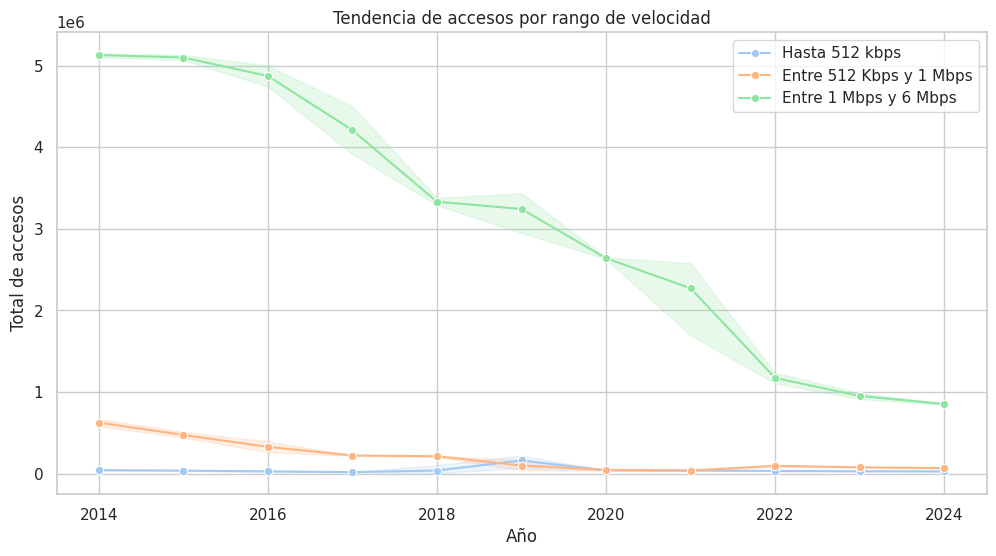

In [132]:
# Selecciona las columnas relevantes
columnas_interes = ['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Total']
df_tendencia = h8[columnas_interes]

# Crea un gráfico de líneas para cada rango de velocidad
plt.figure(figsize=(12, 6))
for columna in ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps']:
    sns.lineplot(x='Año', y=columna, data=df_tendencia, marker='o', label=columna)

plt.title('Tendencia de accesos por rango de velocidad')
plt.xlabel('Año')
plt.ylabel('Total de accesos')
plt.legend()
plt.grid(True)
plt.show()

# 8.4 Análisis de correlación entre los diferentes rangos de velocidad

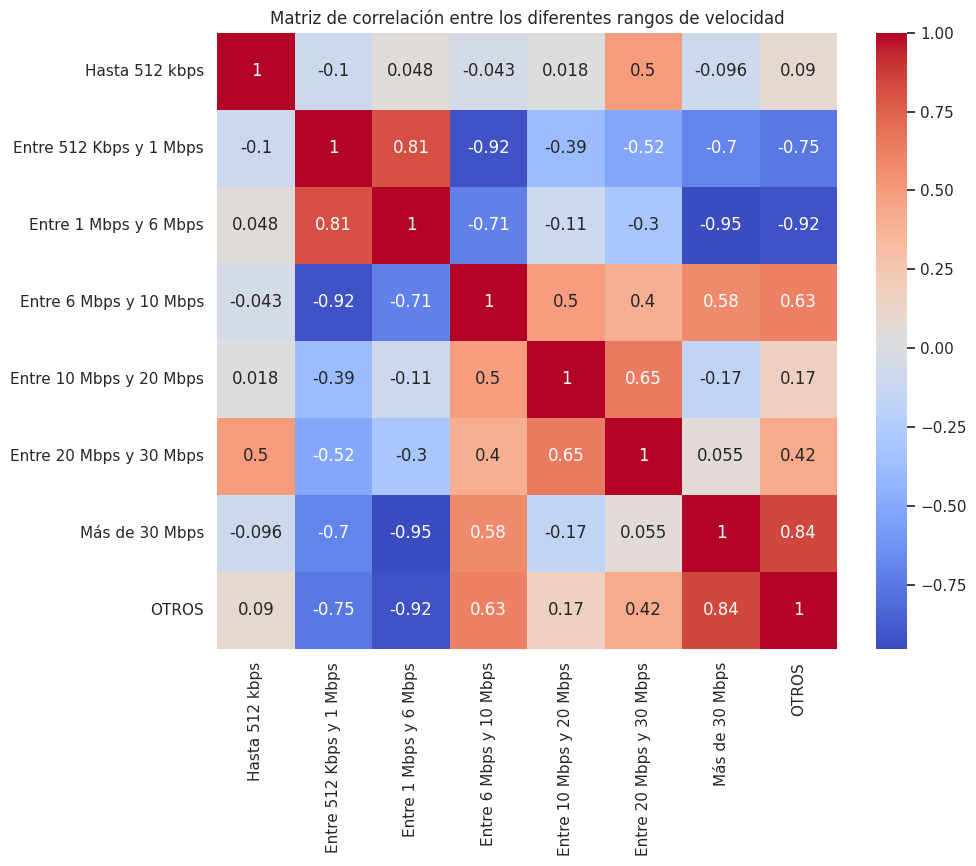

In [133]:
correlation_matrix = h8[[
    'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps',
    'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps',
    'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'OTROS'
]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre los diferentes rangos de velocidad')
plt.show()

# **9. Ingresos**

## **9.1 Información general de dataset**

In [184]:
# Leer la hoja "Ingresos"
import pandas as pd

# Cargar el archivo Excel
xls = pd.ExcelFile('Internet_cleaned_no_duplicates.xlsx')

# Leer la hoja específica
h9 = pd.read_excel(xls, sheet_name='Ingresos ')

# Mostrar las primeras filas del DataFrame
print(h9.head())

    Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2024          2               4.420322e+08   Abr-Jun 2024
1  2024          1               3.461990e+08   Ene-Mar 2024
2  2023          4               1.673760e+08   Oct-Dic 2023
3  2023          3               1.331066e+08  Jul-Sept 2023
4  2023          2               1.180603e+08   Jun-Mar 2023


In [185]:
# Obtener la forma de la hoja (número de filas y columnas)
print(h9.shape)

# Obtener los nombres de las columnas
print(h9.columns)

# Obtener los tipos de datos de cada columna
print(h9.dtypes)

# Estadísticas descriptivas
print(h9.describe())

(42, 4)
Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')
Año                            int64
Trimestre                      int64
Ingresos (miles de pesos)    float64
Periodo                       object
dtype: object
               Año  Trimestre  Ingresos (miles de pesos)
count    42.000000  42.000000               4.200000e+01
mean   2019.000000   2.452381               5.001648e+07
std       3.728597   1.130560               8.710208e+07
min    2014.000000   1.000000               2.984054e+06
25%    2016.000000   1.250000               7.055326e+06
50%    2019.000000   2.000000               2.047527e+07
75%    2021.000000   3.000000               4.485090e+07
max    2033.000000   4.000000               4.420322e+08


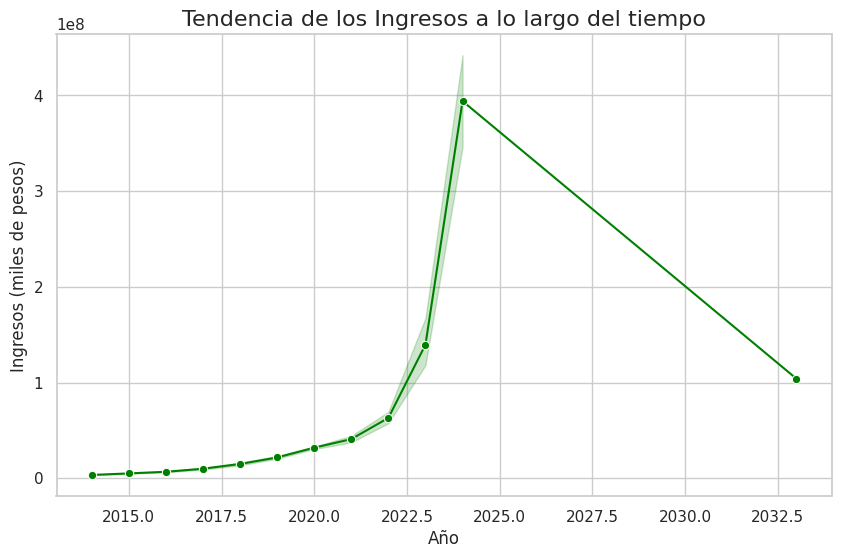

In [186]:
# Análisis de la tendencia de los ingresos a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Ingresos (miles de pesos)', data=h9, marker='o', color='green')
plt.title('Tendencia de los Ingresos a lo largo del tiempo', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ingresos (miles de pesos)', fontsize=12)
plt.grid(True)
plt.show()



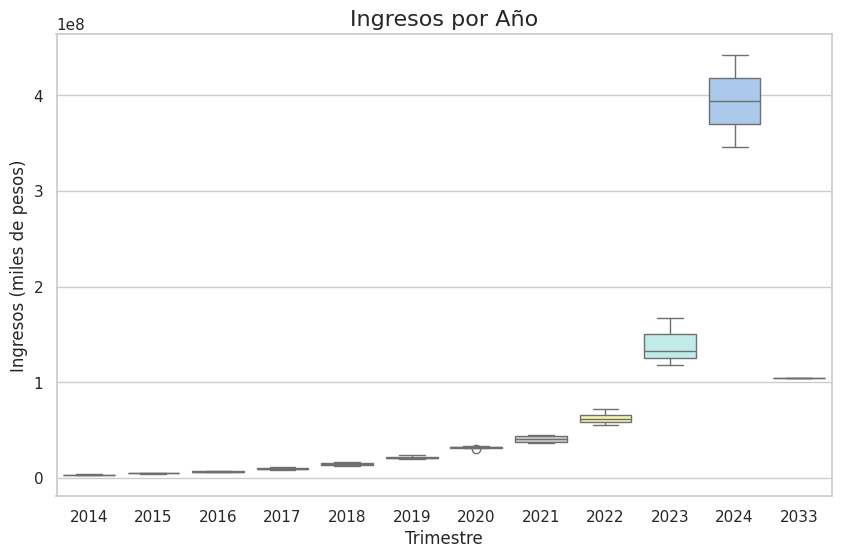

In [187]:
# Análisis de los ingresos por trimestre
plt.figure(figsize=(10, 6))
sns.boxplot(x='Año', y='Ingresos (miles de pesos)', data=h9, palette='pastel')
plt.title('Ingresos por Año', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Ingresos (miles de pesos)', fontsize=12)
plt.show()
